In [122]:
'''
Problem Statement : house price prediction
# why this dataset: becoz by predicting right price of house we can help people in planning. #community help

0   crim      506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64

total no.of rows: 506  
total no. of columns: 14 

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

First step : EDA
1. Checking data has any NULL value , Duplicate Values , Wrong Data types
2.Dealing with ouliers

'''

"\nProblem Statement : house price prediction\n# why this dataset: becoz by predicting right price of house we can help people in planning. #community help\n\n0   crim      506 non-null    float64\n 1   zn       506 non-null    float64\n 2   indus    506 non-null    float64\n 3   chas     506 non-null    int64  \n 4   nox      506 non-null    float64\n 5   rm       506 non-null    float64\n 6   age      506 non-null    float64\n 7   dis      506 non-null    float64\n 8   rad      506 non-null    int64  \n 9   tax      506 non-null    int64  \n 10  ptratio  506 non-null    float64\n 11  b        506 non-null    float64\n 12  lstat    506 non-null    float64\n 13  medv     506 non-null    float64\n\ntotal no.of rows: 506  \ntotal no. of columns: 14 \n\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwi

In [123]:
import pandas as pd
#from sklearn.datasets import fetch_california_housing

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

In [126]:
dataset=df

In [127]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [128]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [130]:
#Checking NULL value is present in dataset or not
#Null values are not present
#If the NULL values are present use df = df.dropna() to remove them
(df.isnull().sum()/len(df))*100

'''
if the  has 0 to 2% drop rows
if the columns 3 to 40% is numeraical has normal destiribuation replace with mean
if not replace with median
if greater than 40% drop the column
if the columns is catogarical replace with mode

'''

'\nif the  has 0 to 2% drop rows\nif the columns 3 to 40% is numeraical has normal destiribuation replace with mean\nif not replace with median\nif greater than 40% drop the column\nif the columns is catogarical replace with mode\n\n'

In [131]:
#Checking Duplicate value is present in dataset or not
#Duplicate values are not present
#If the duplicate values are present use df = df.drop_duplicates() to remove them
(df.duplicated().sum()/len(df))*100

0.0

Outliers

In [132]:
#Checking Outliers if the outlier are presents its going to affect on your data 
columns=df.select_dtypes(['int','float']).columns
columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [133]:
len(columns)

14

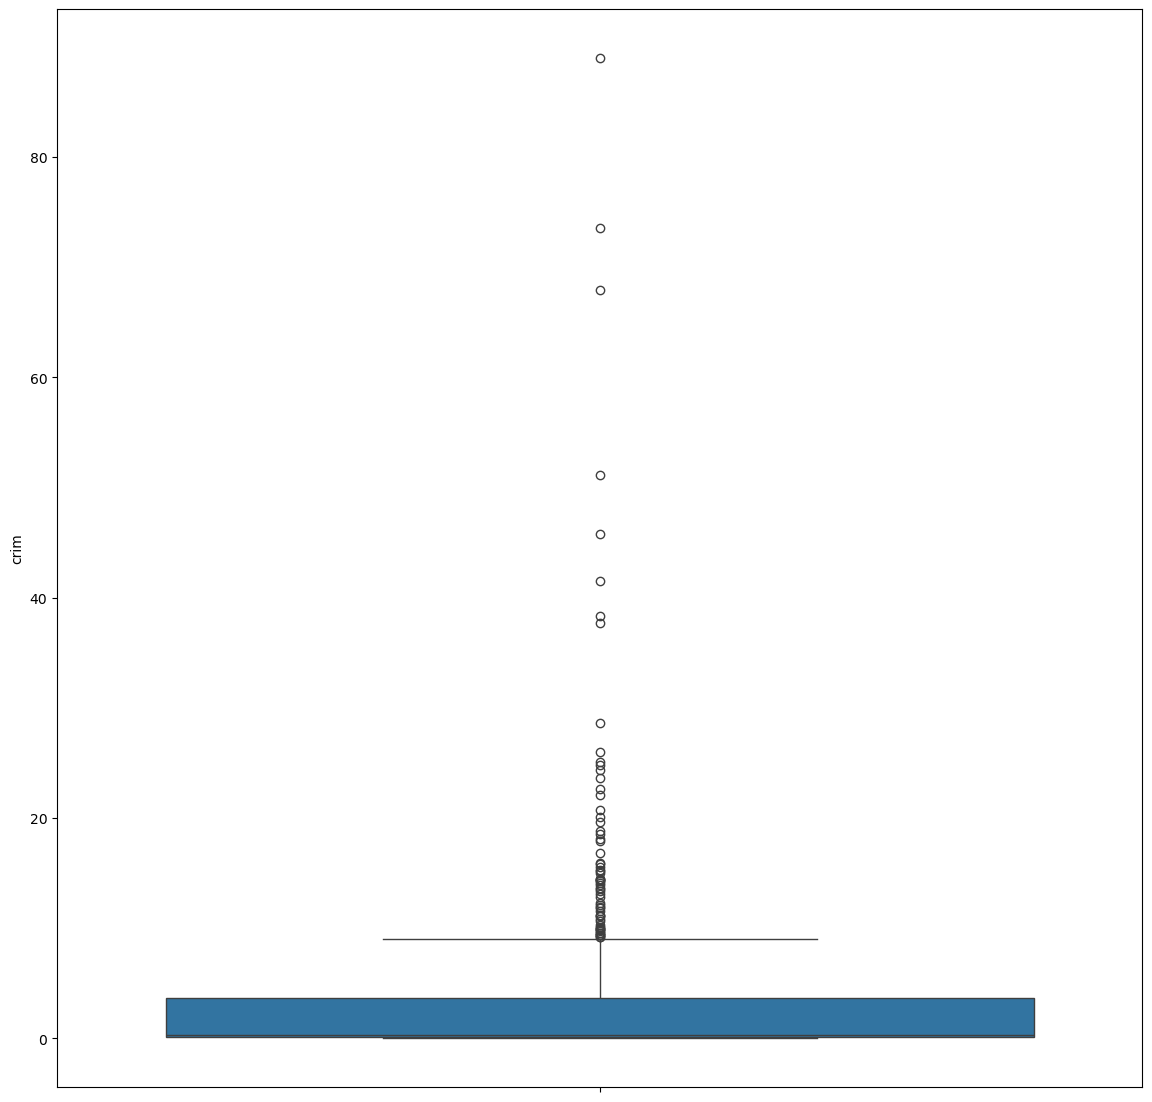

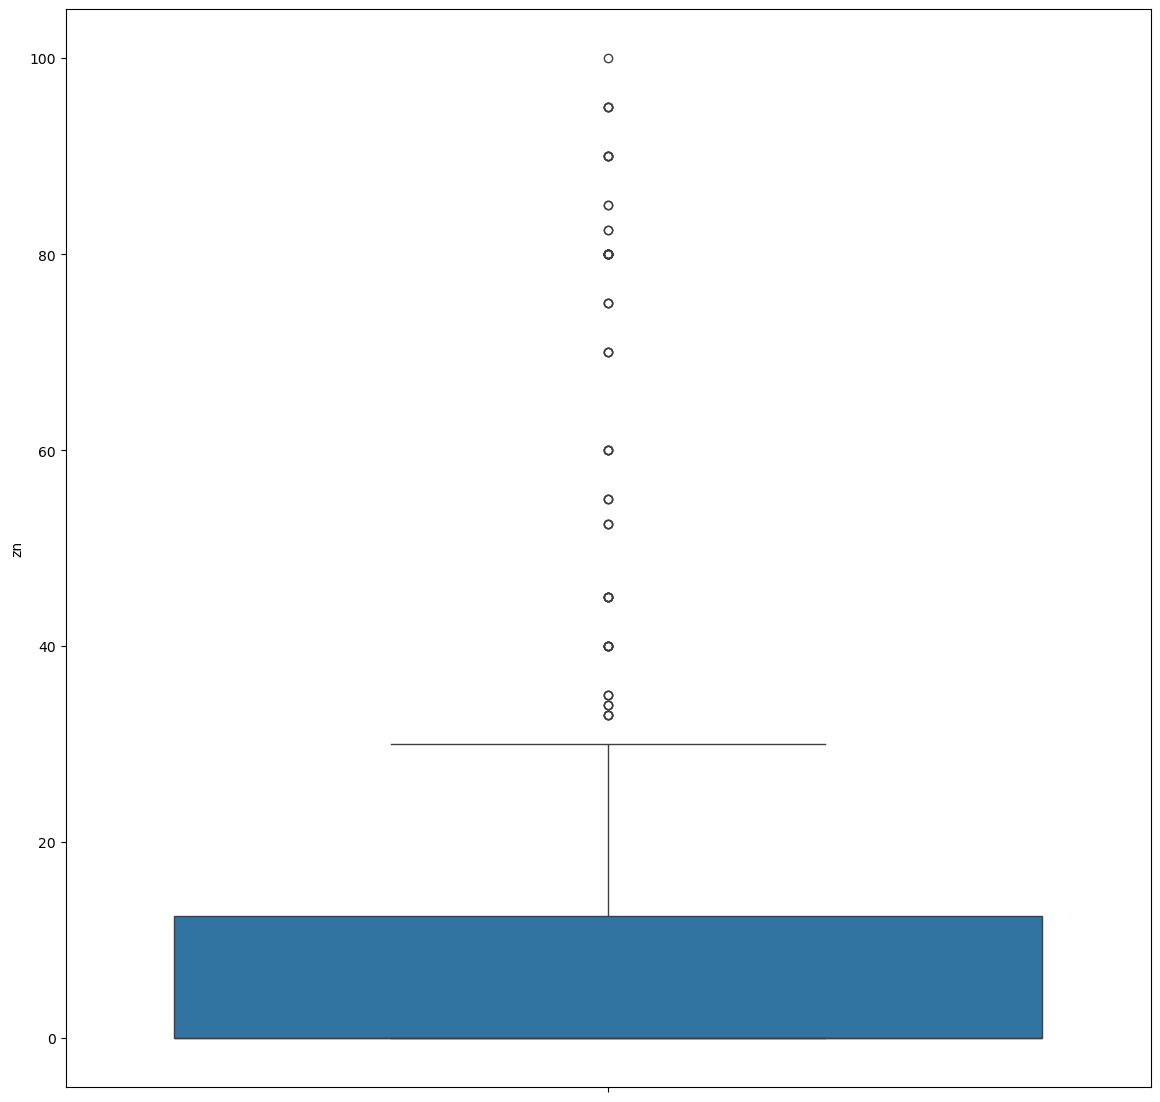

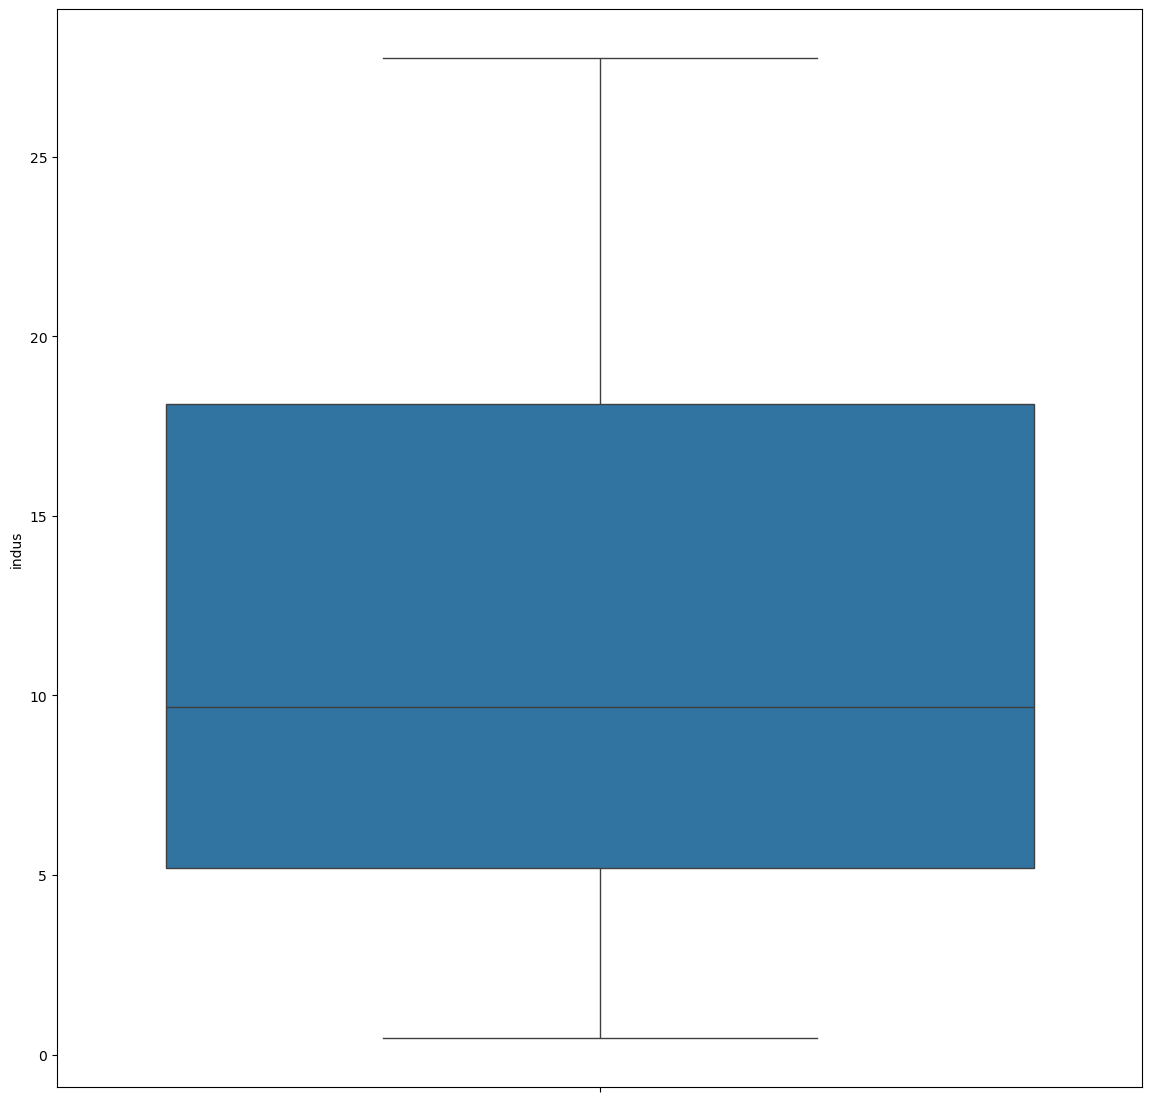

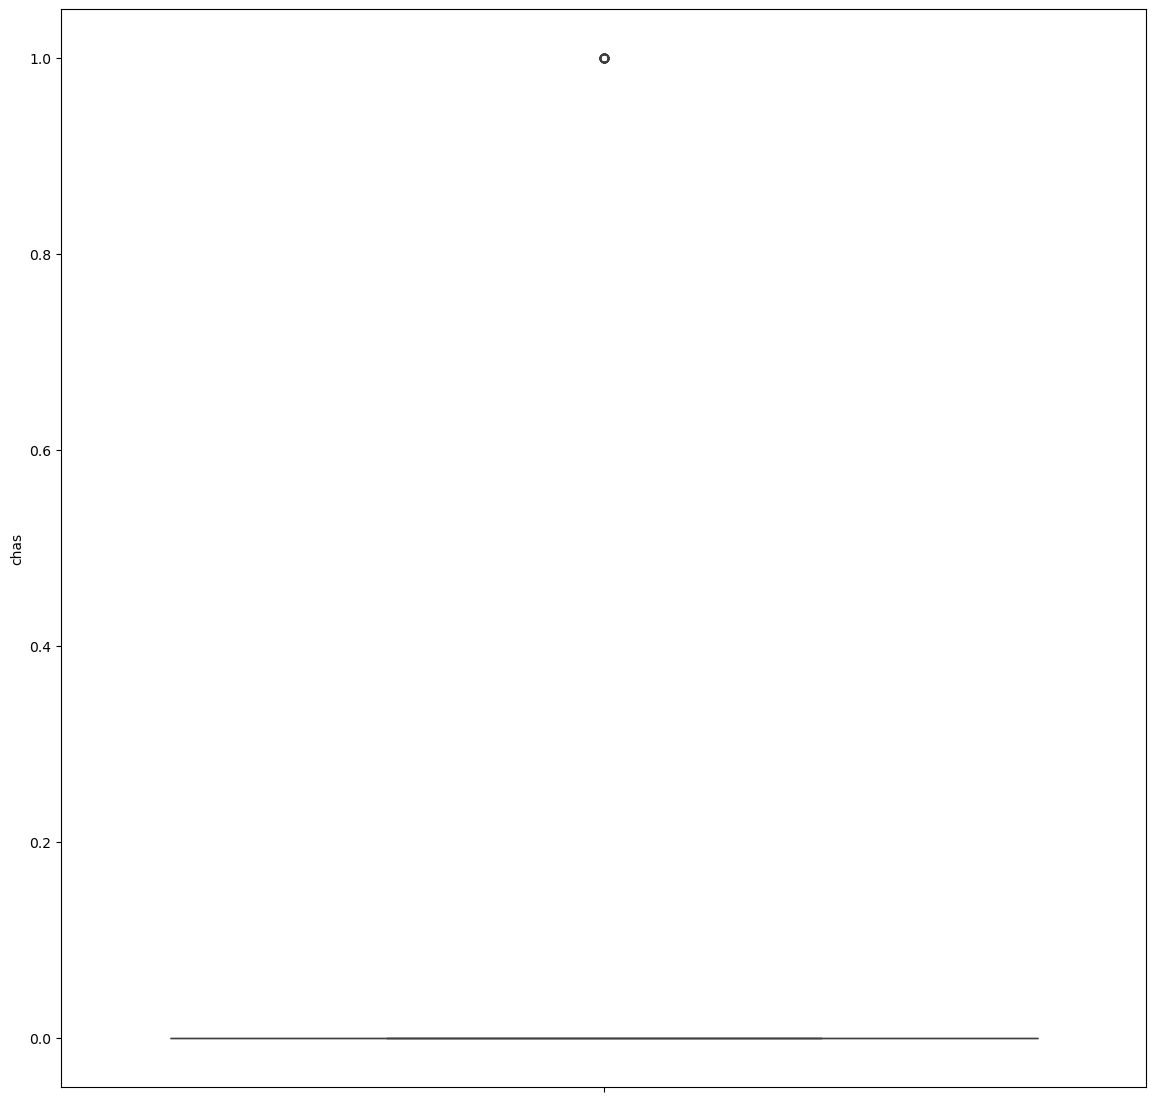

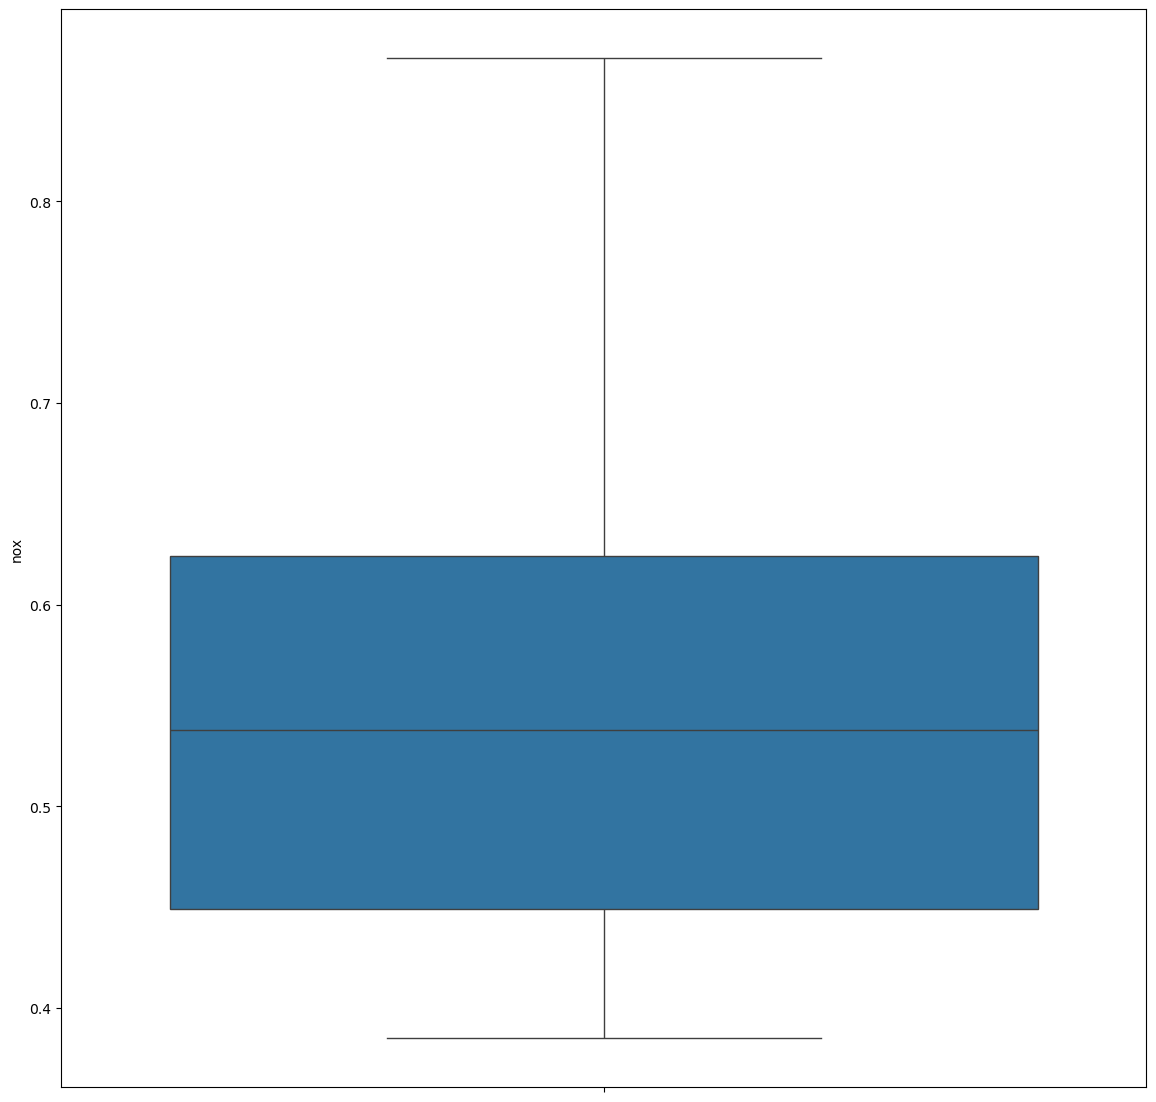

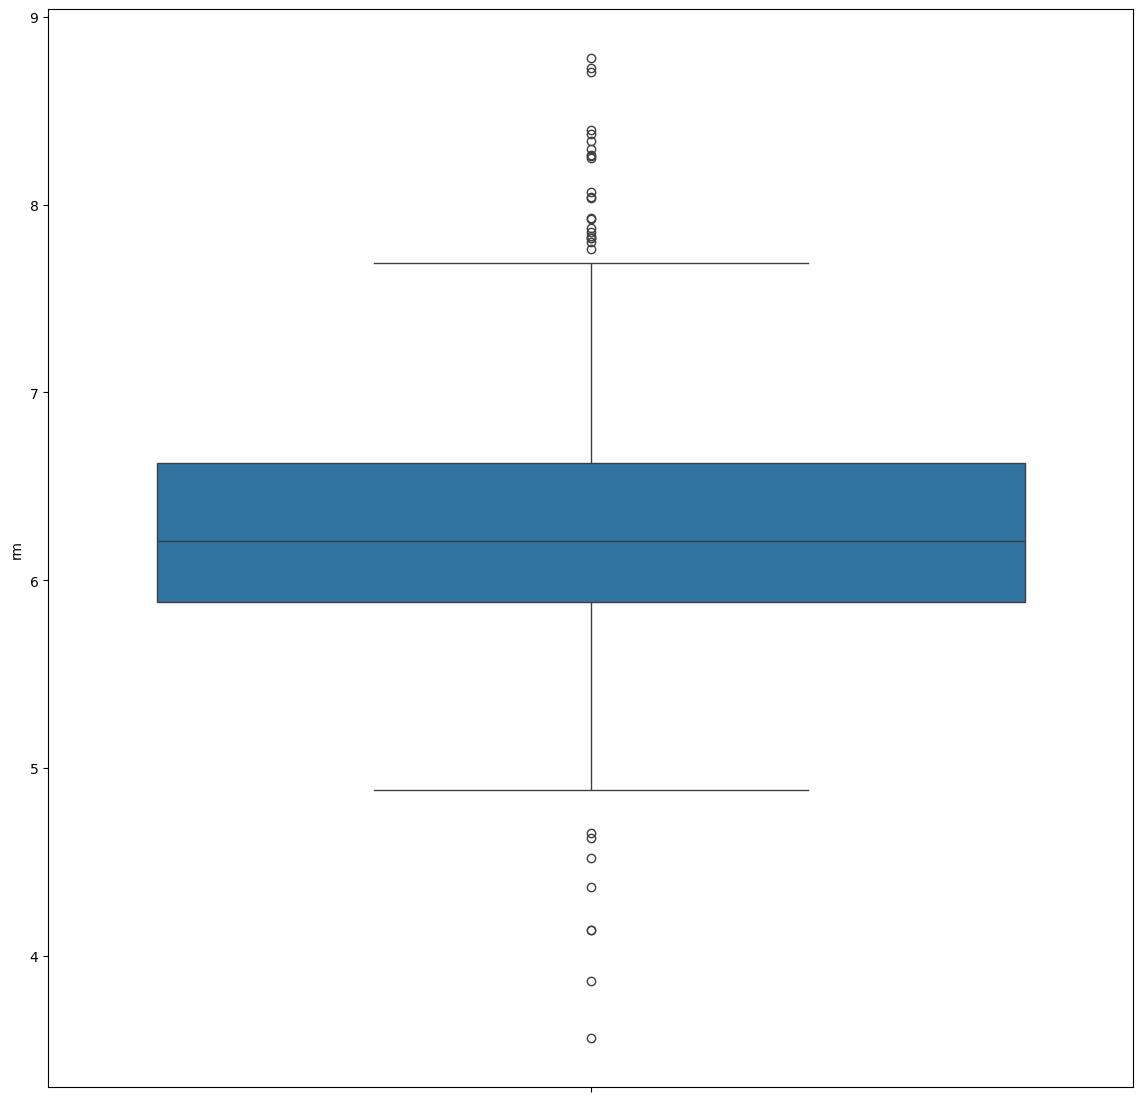

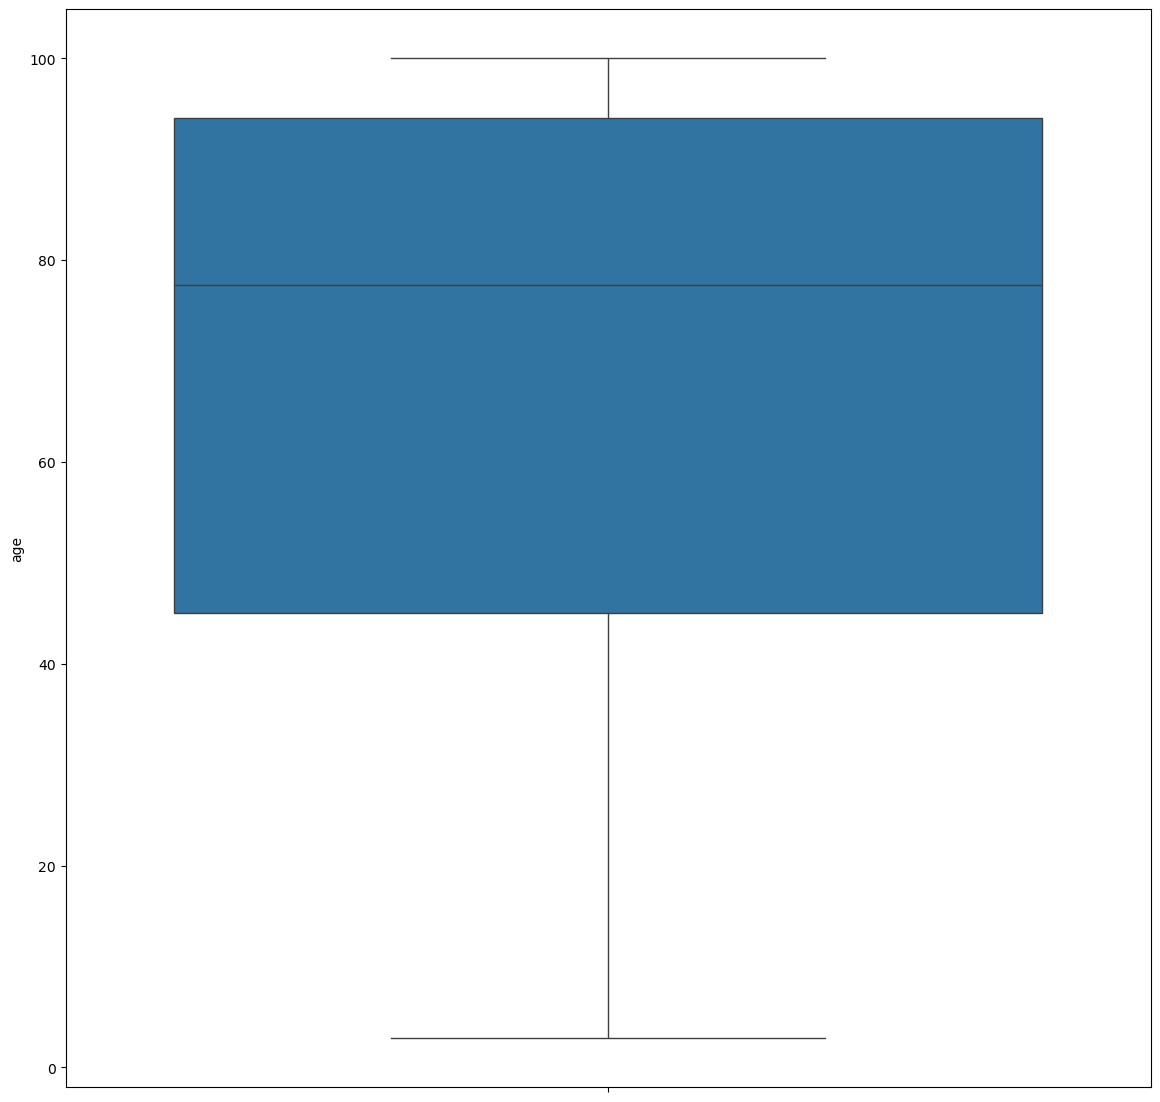

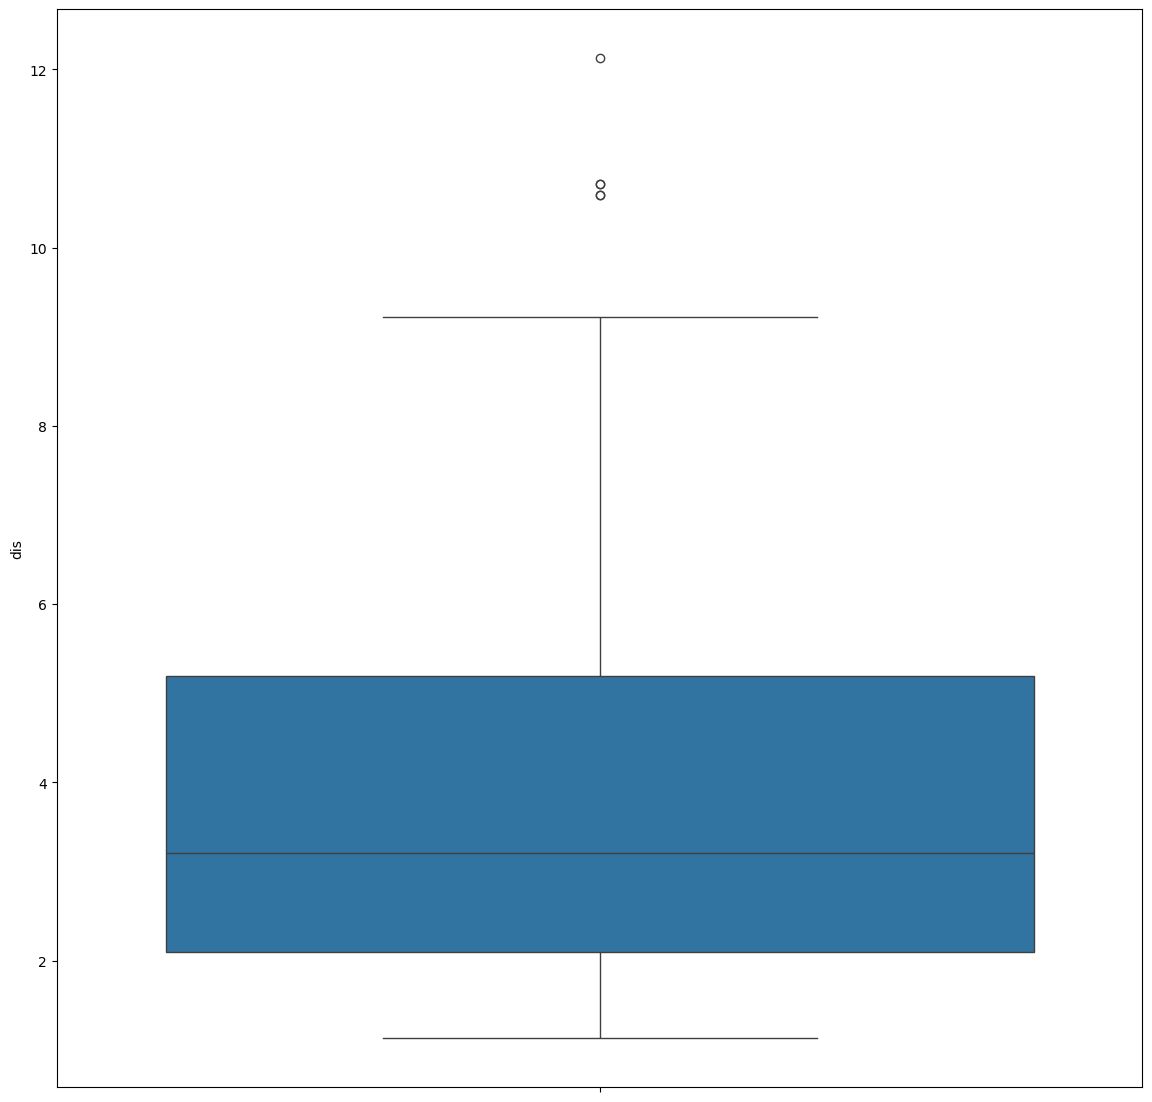

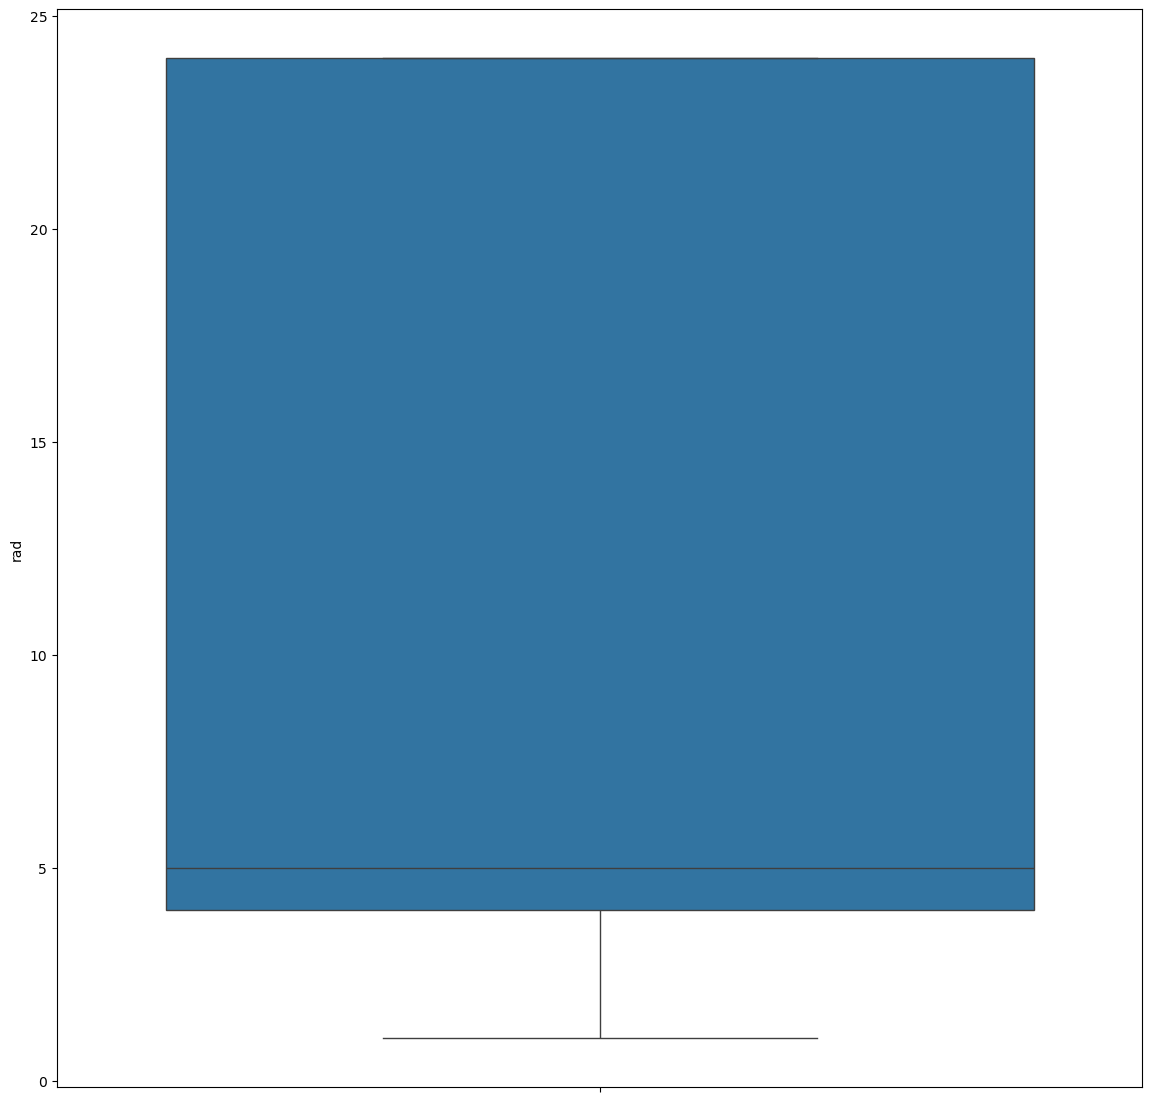

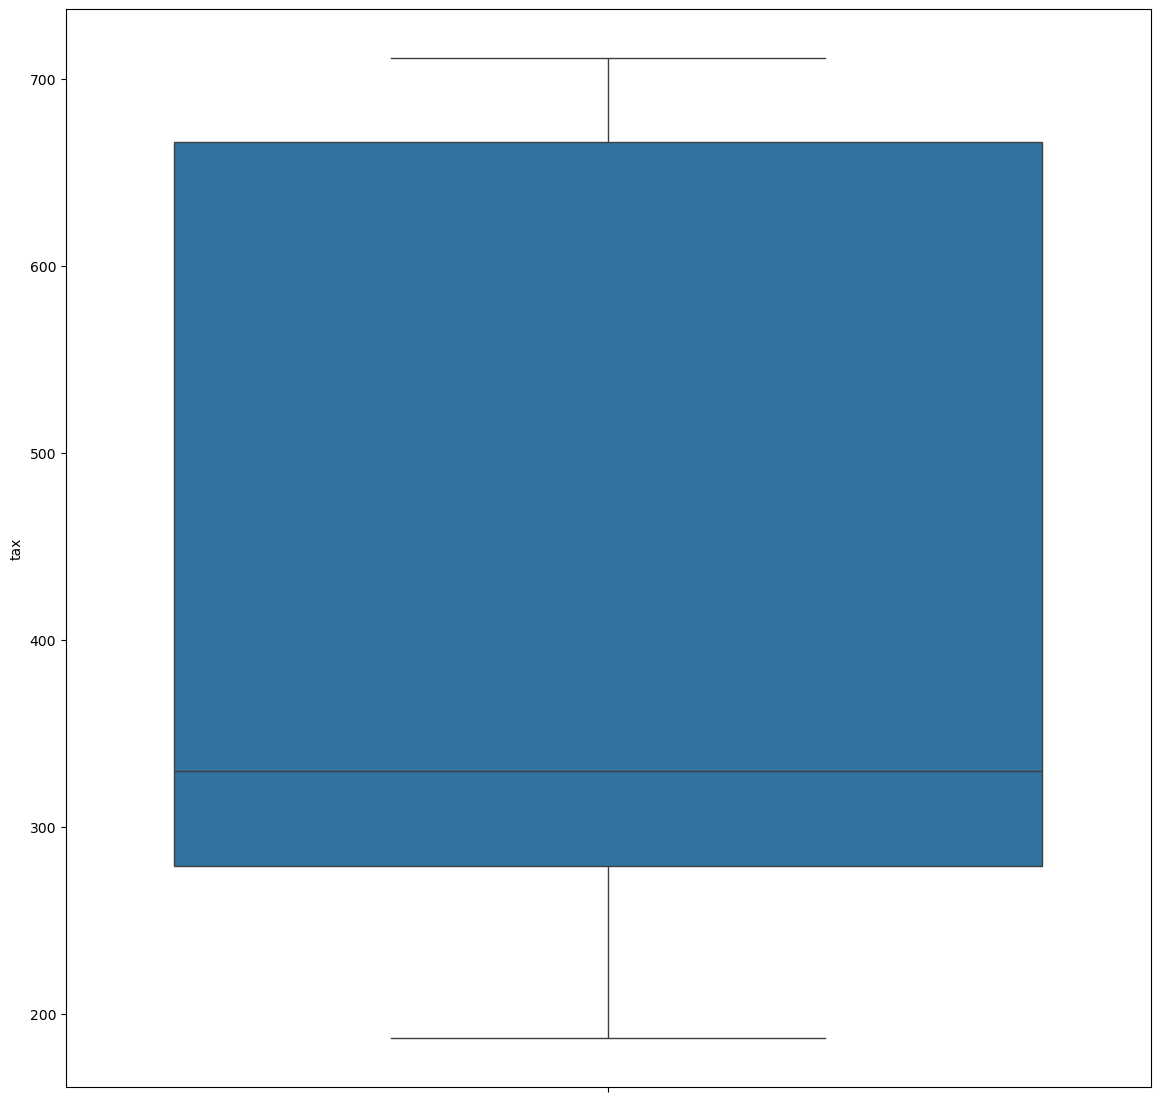

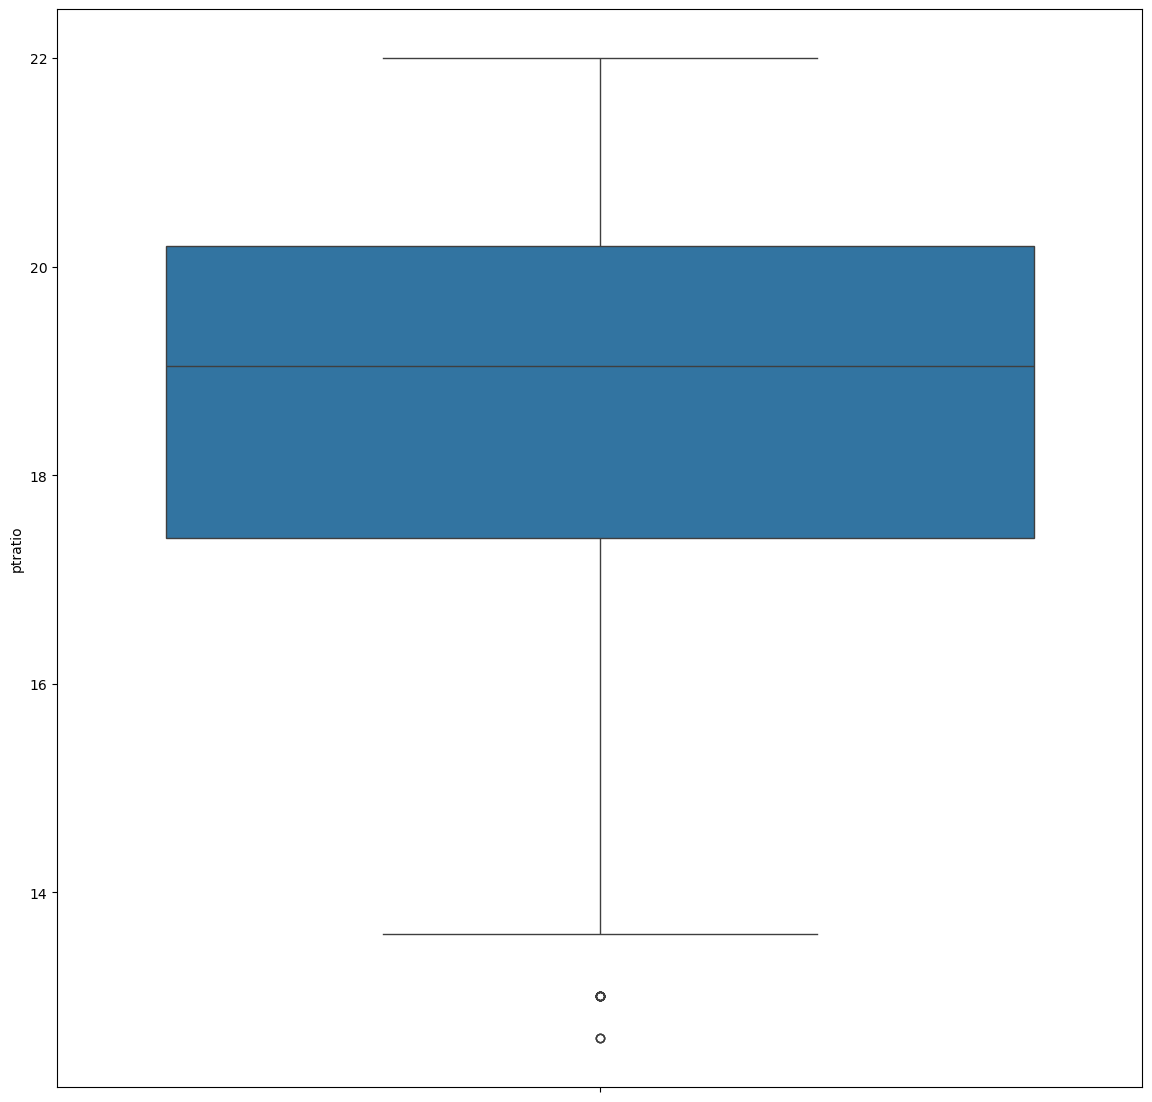

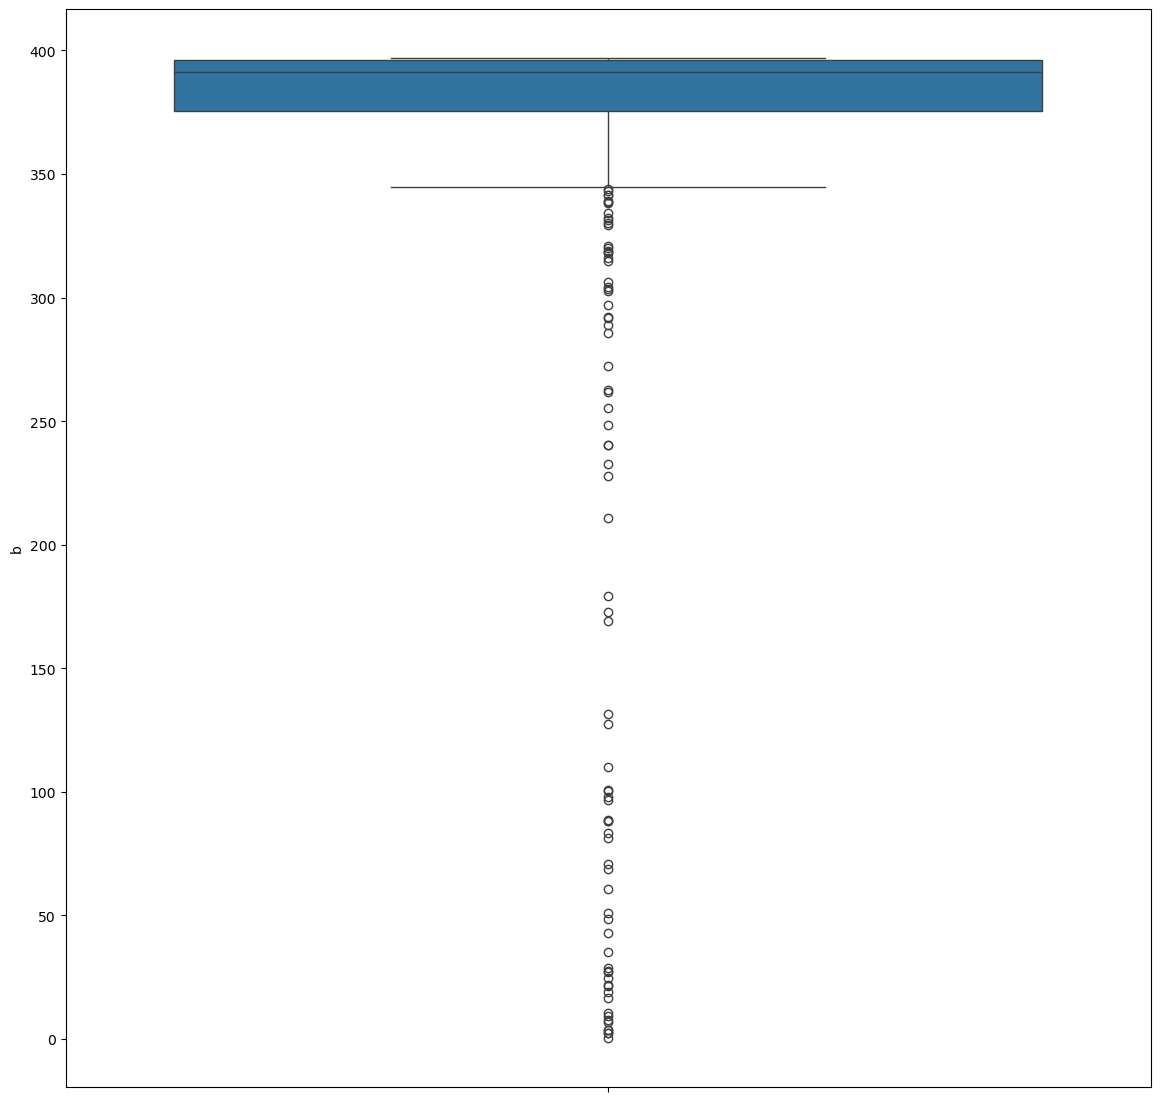

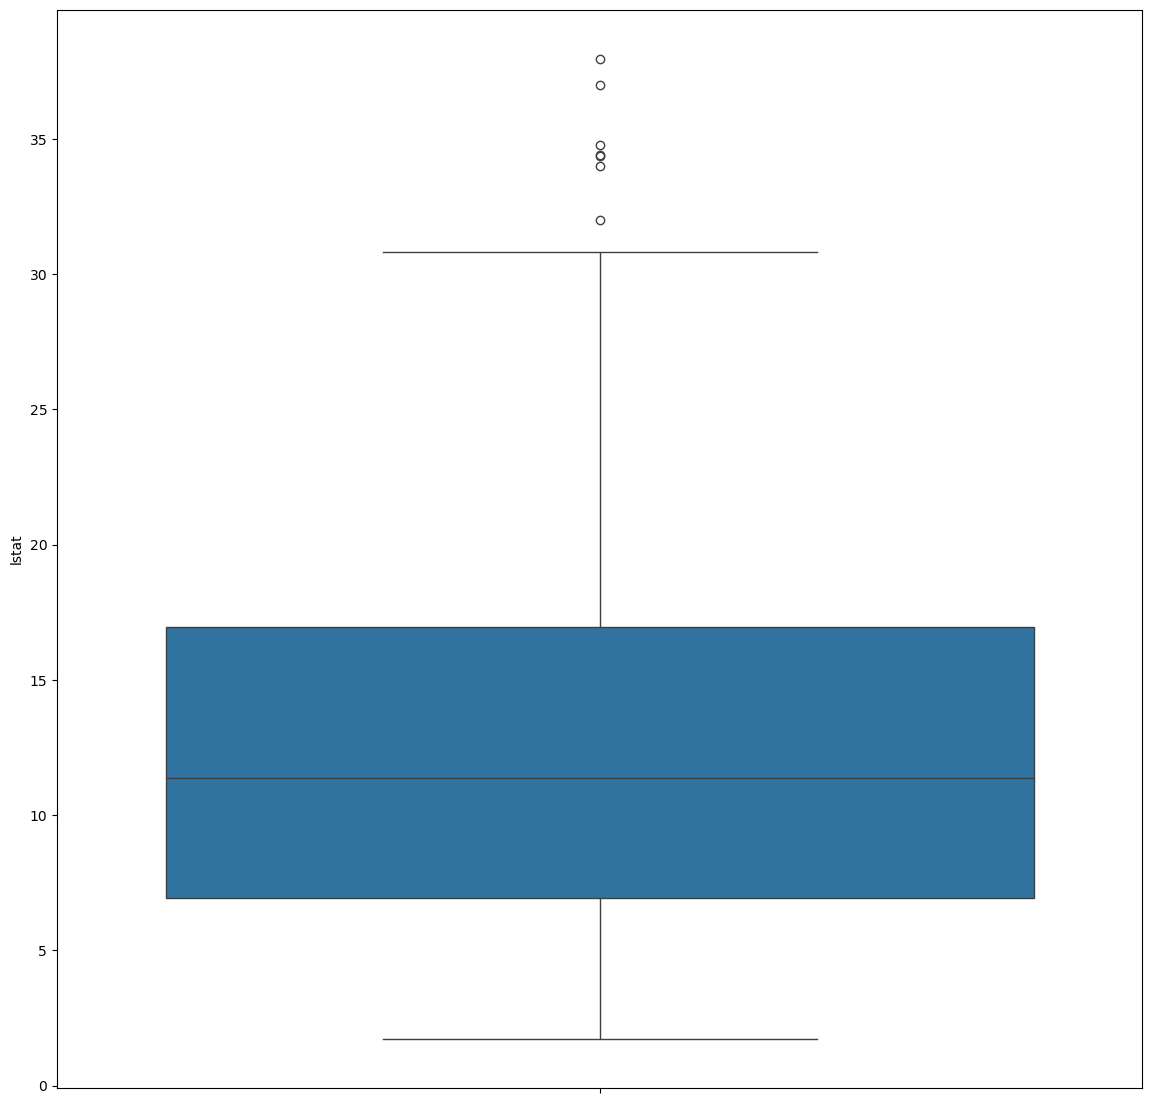

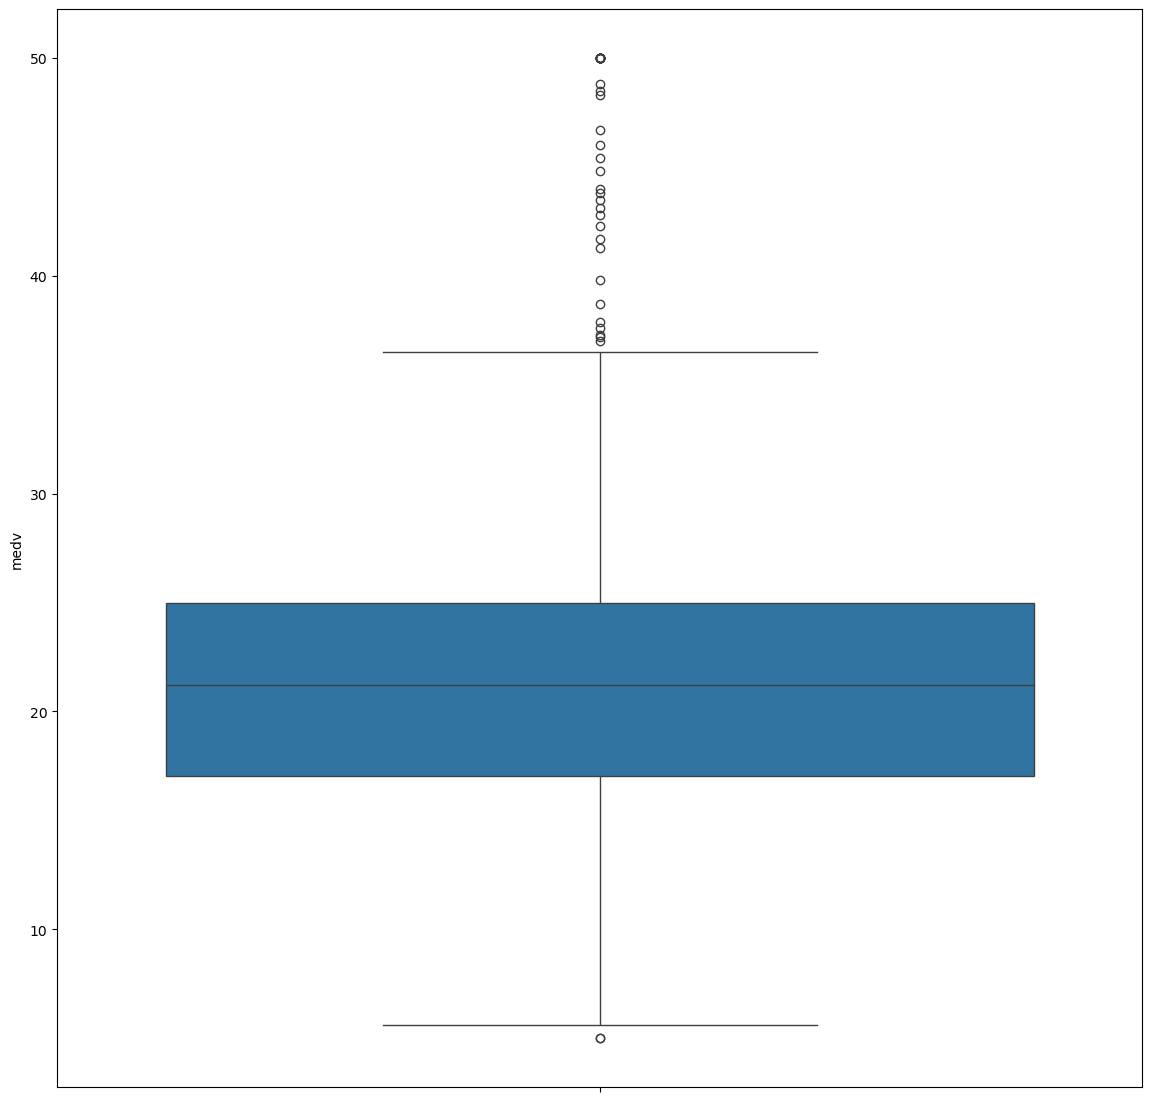

In [134]:
for i in columns:
    plt.figure(figsize=(14,14))
    sns.boxplot(df[i])
    plt.show()

In [135]:
'''
Any value below lw is replaced with lw.
Any value above uw is replaced with uw.
Values in between stay unchanged.
'''
def Rplace_Outliers(x):
    n_c=x.select_dtypes(include=['float64', 'int64']).columns
    for i in n_c:
        q1=x[i].quantile(0.25)
        q3=x[i].quantile(0.75)
        iqr=q3-q1
        lw=q1-1.5*iqr
        uw=q3+1.5*iqr
        print(f"{i}: lw = {lw}, uw = {uw}")
        x[i]=x[i].apply(lambda val:min(max(val,lw),uw))
    return x

df=Rplace_Outliers(df)        

crim: lw = -5.31051125, uw = 9.06963875
zn: lw = -18.75, uw = 31.25
indus: lw = -14.175, uw = 37.465
chas: lw = 0.0, uw = 0.0
nox: lw = 0.18650000000000005, uw = 0.8865
rm: lw = 4.778499999999999, uw = 7.730500000000001
age: lw = -28.54999999999999, uw = 167.64999999999998
dis: lw = -2.5322000000000005, uw = 9.820800000000002
rad: lw = -26.0, uw = 54.0
tax: lw = -301.5, uw = 1246.5
ptratio: lw = 13.199999999999998, uw = 24.4
b: lw = 344.10624999999993, uw = 427.49625000000003
lstat: lw = -8.057500000000005, uw = 31.962500000000006
medv: lw = 5.0624999999999964, uw = 36.962500000000006


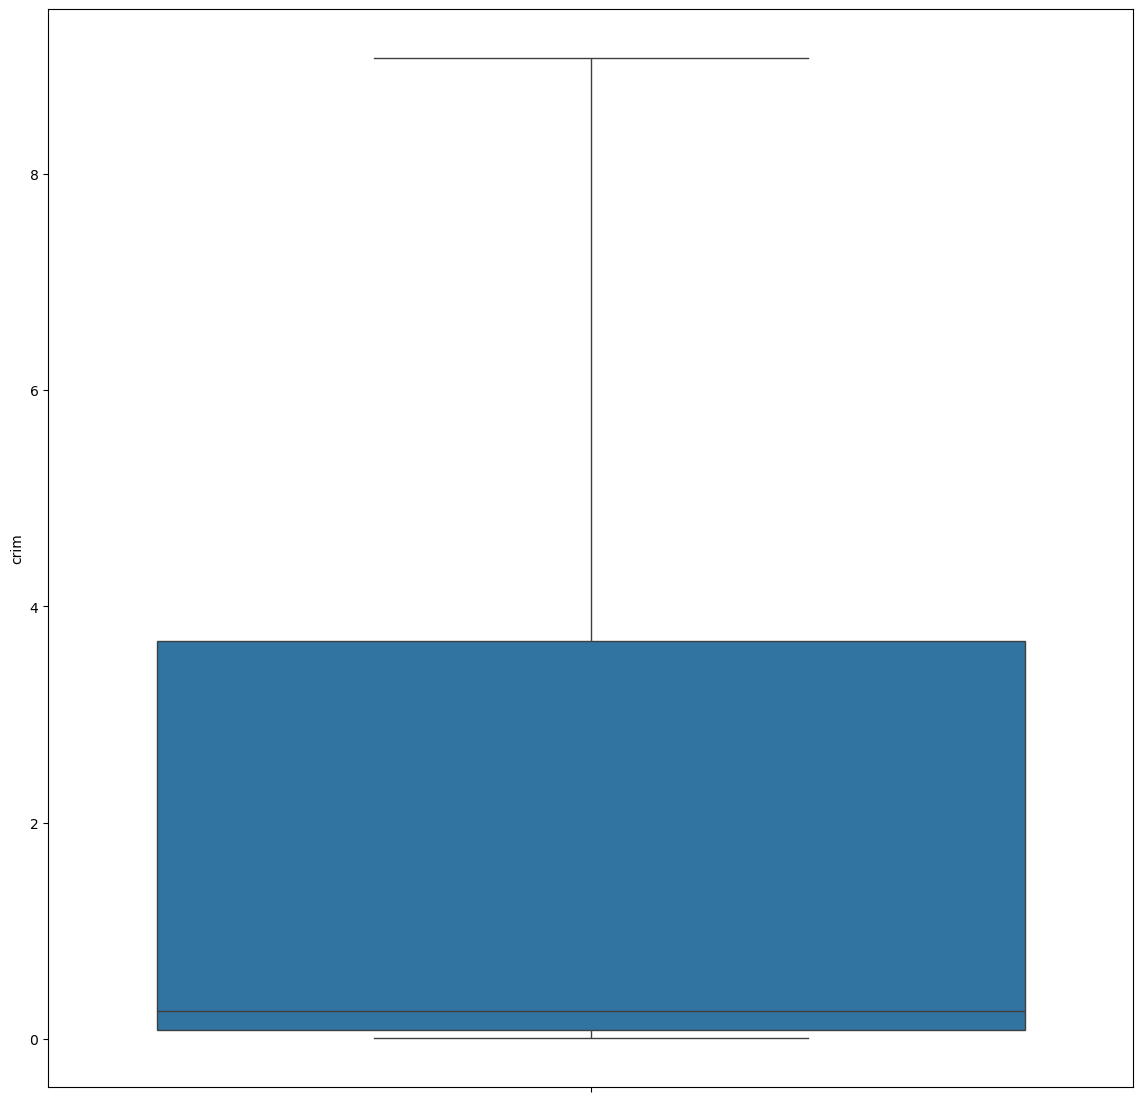

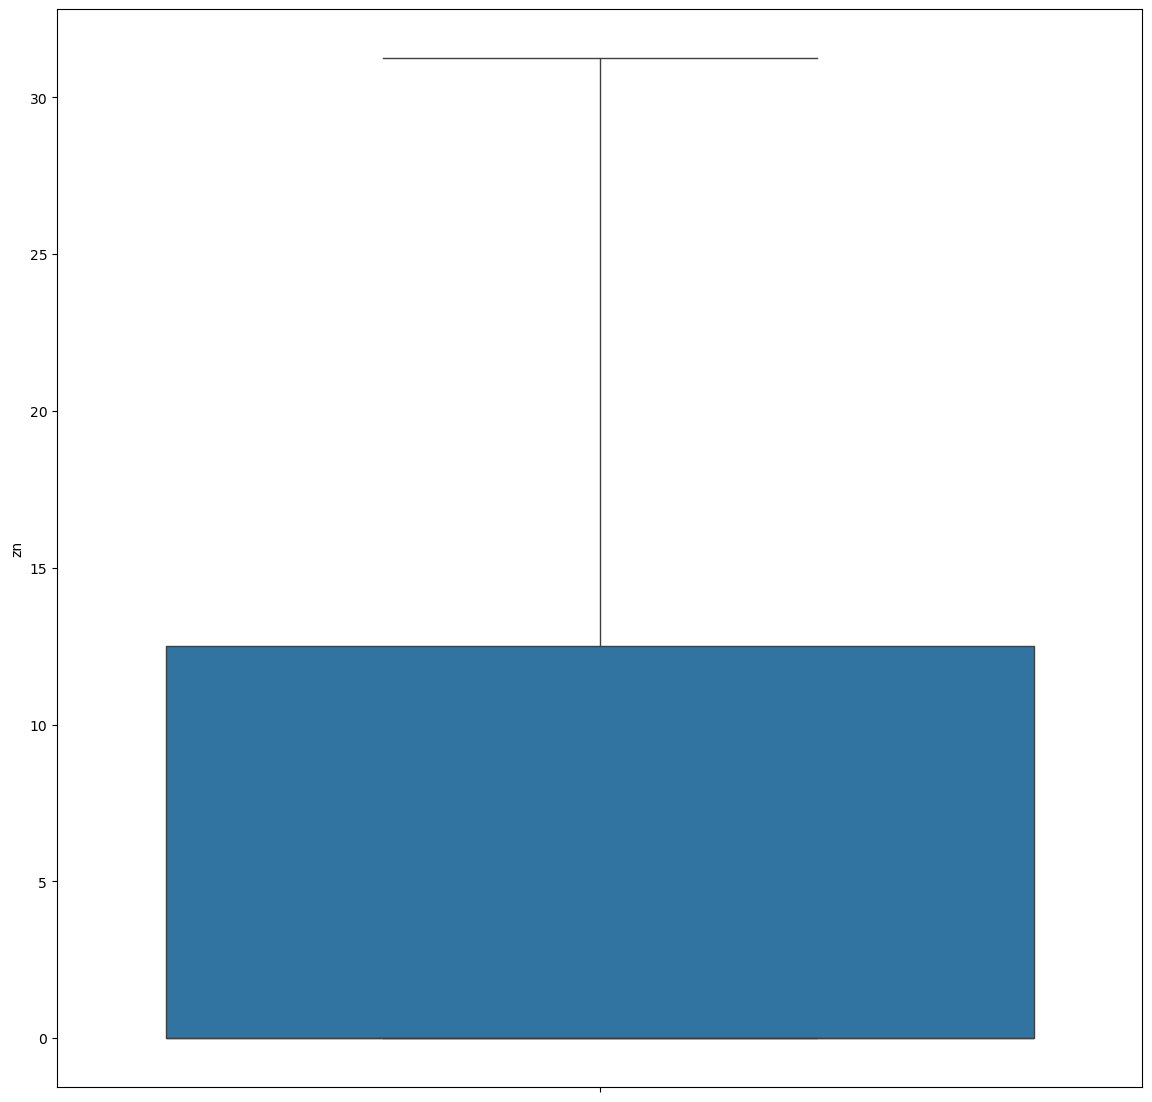

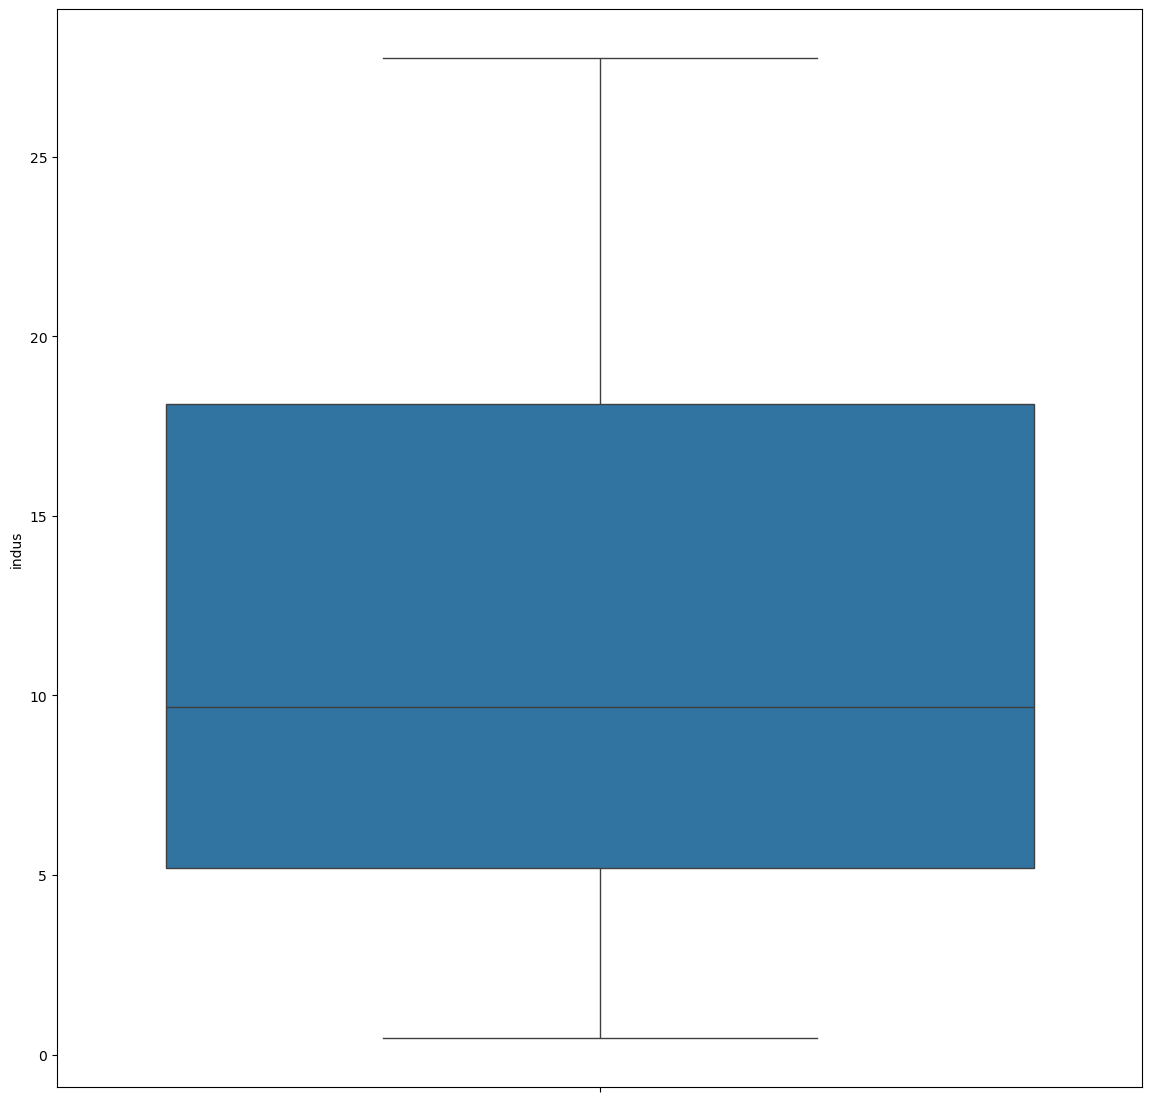

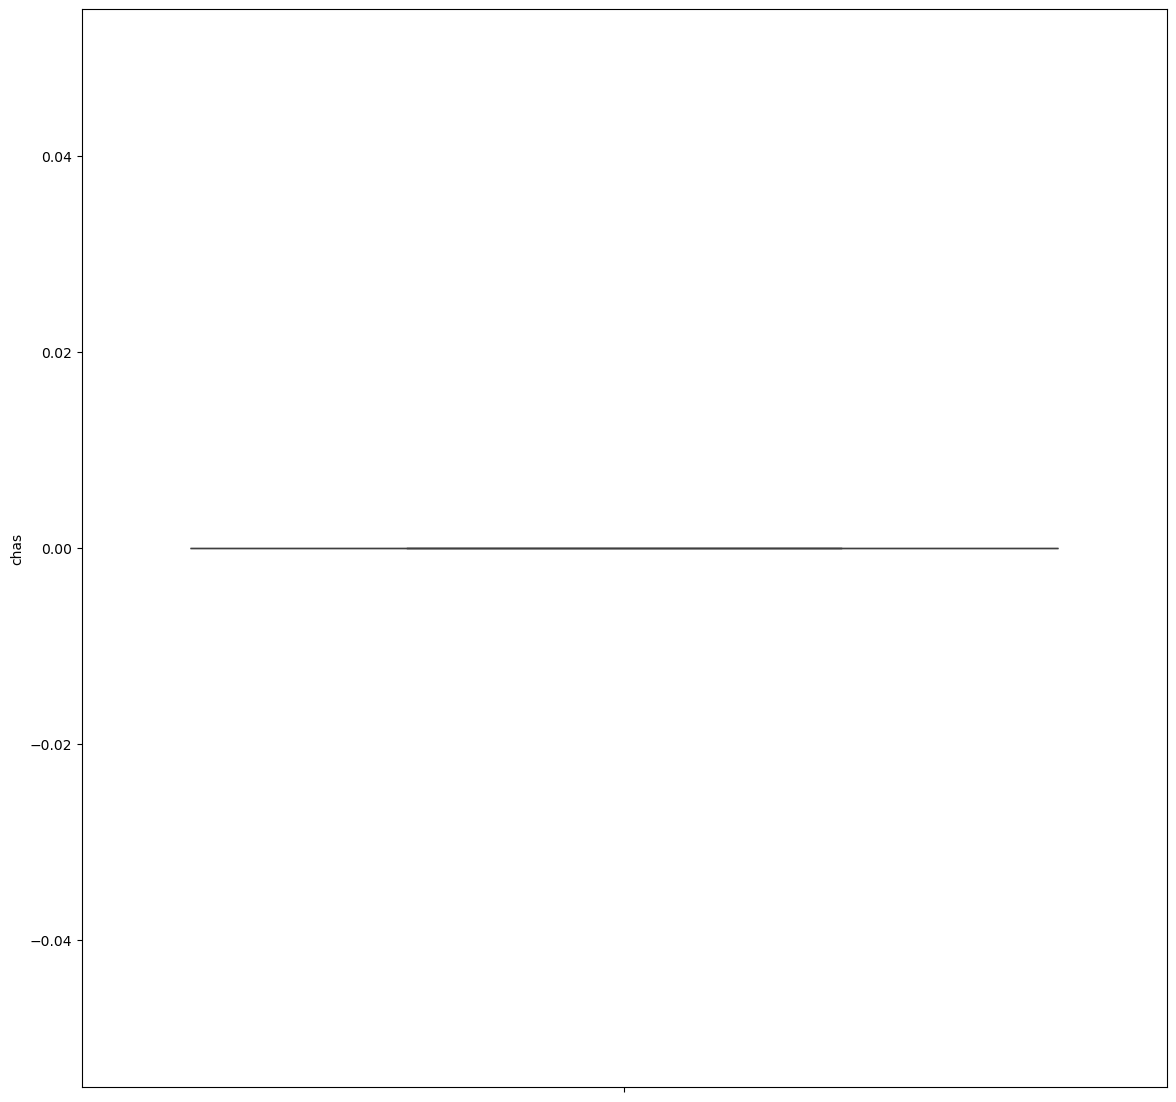

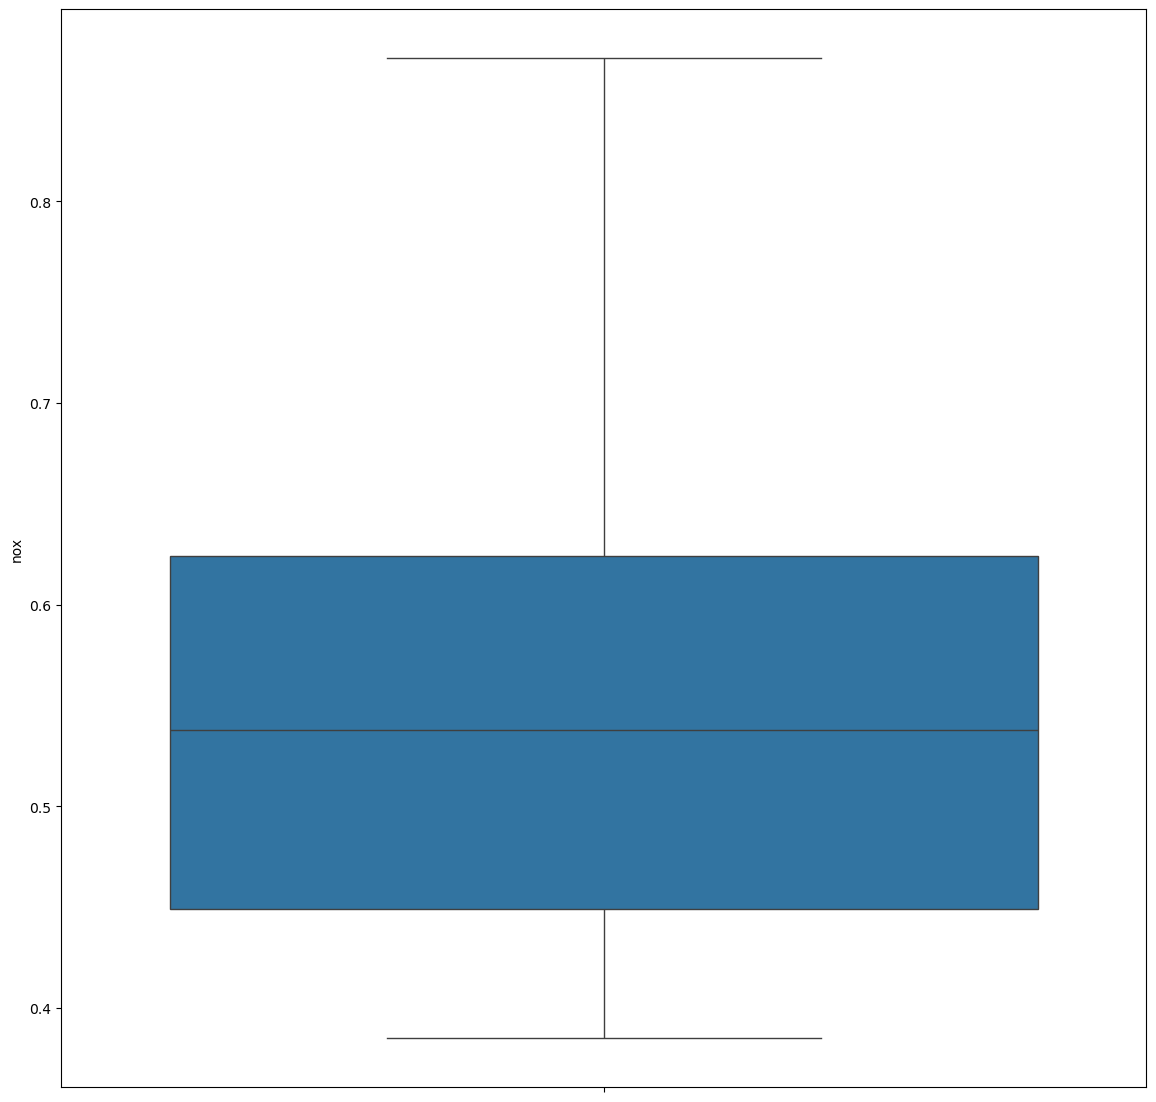

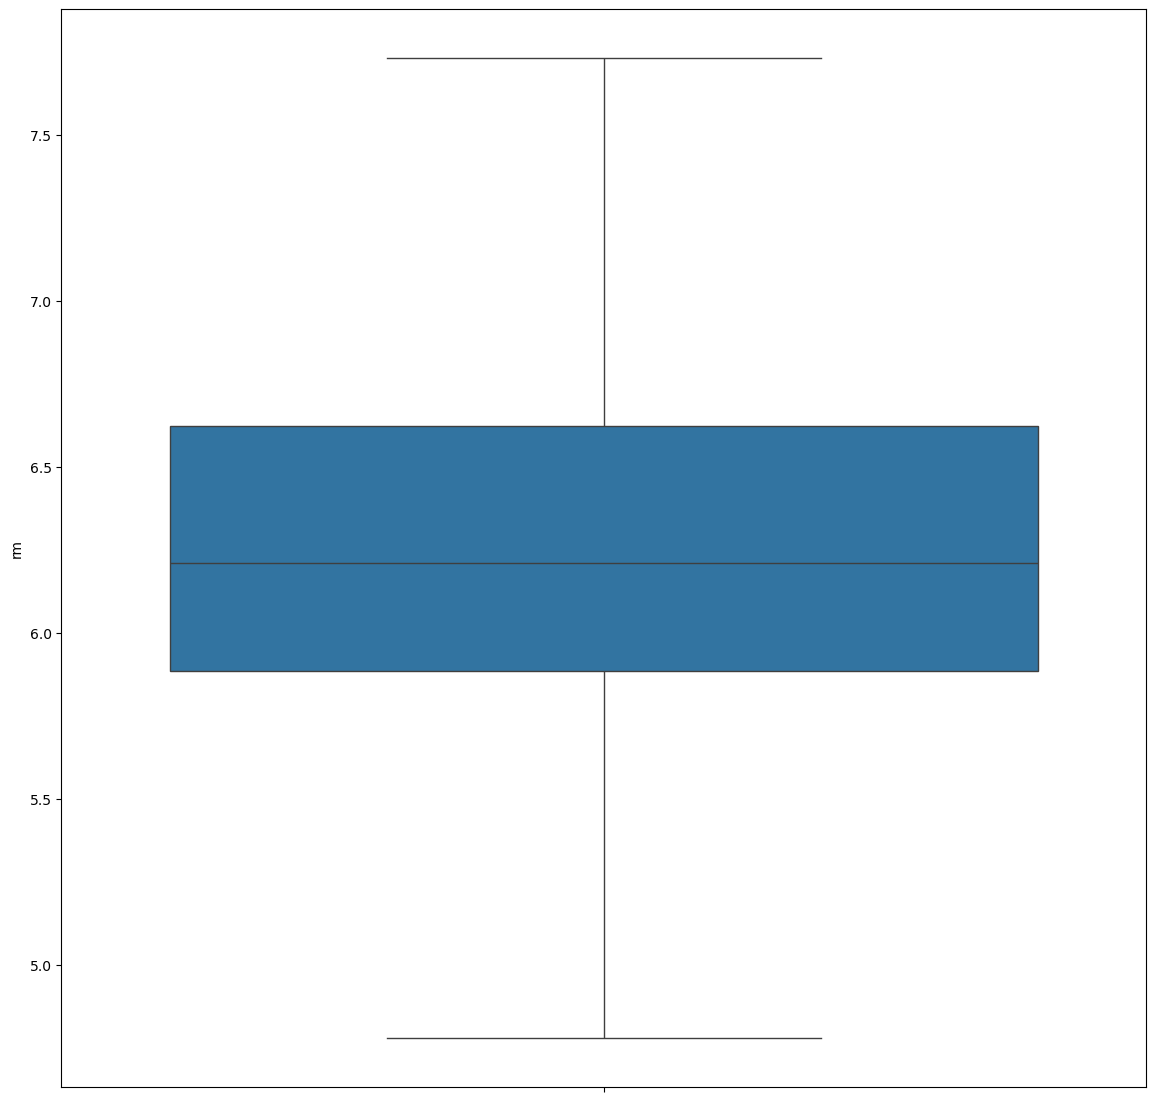

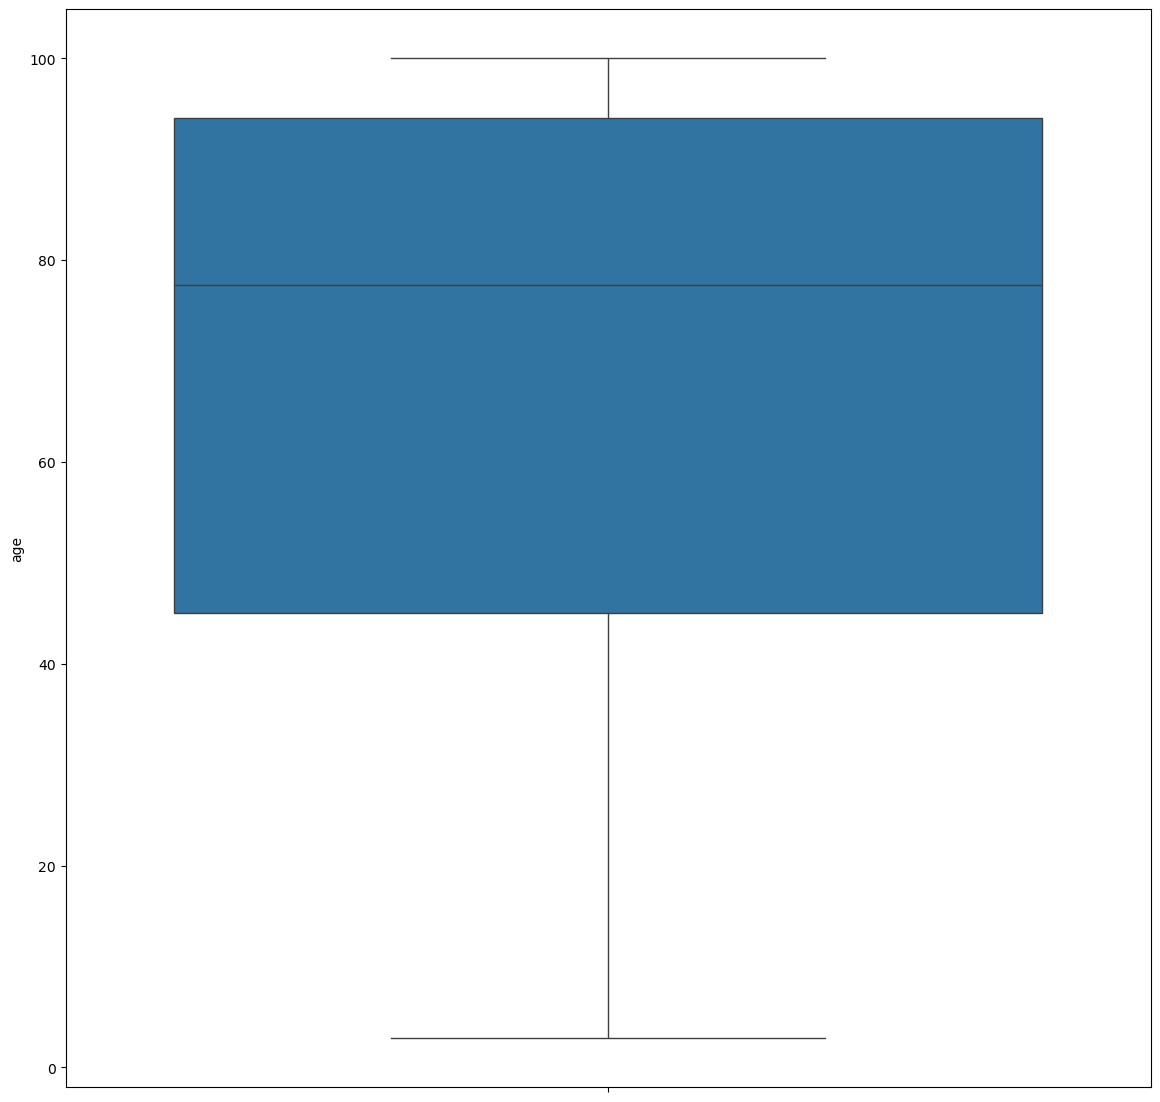

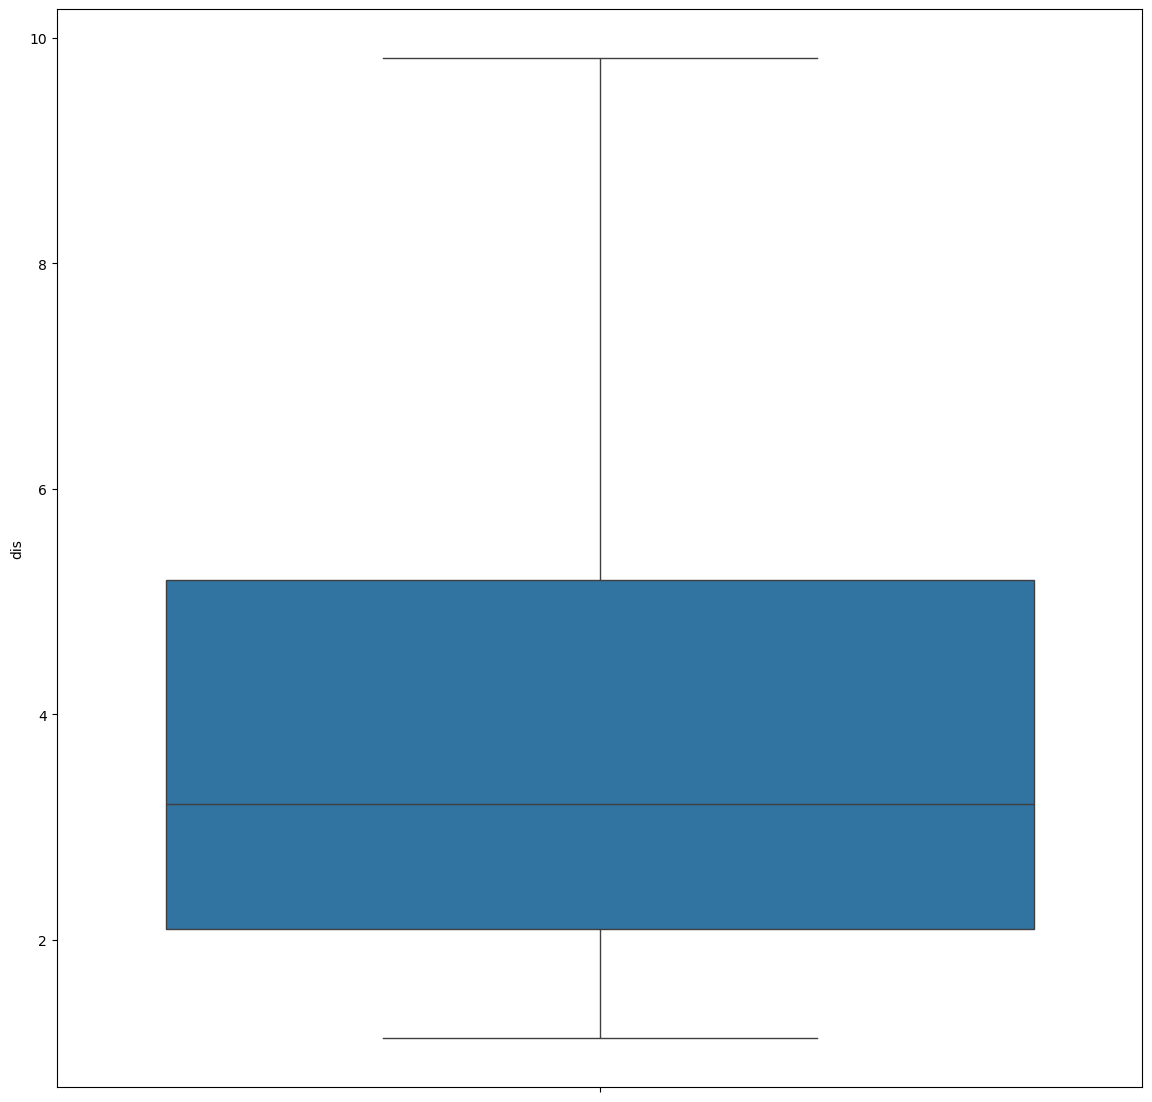

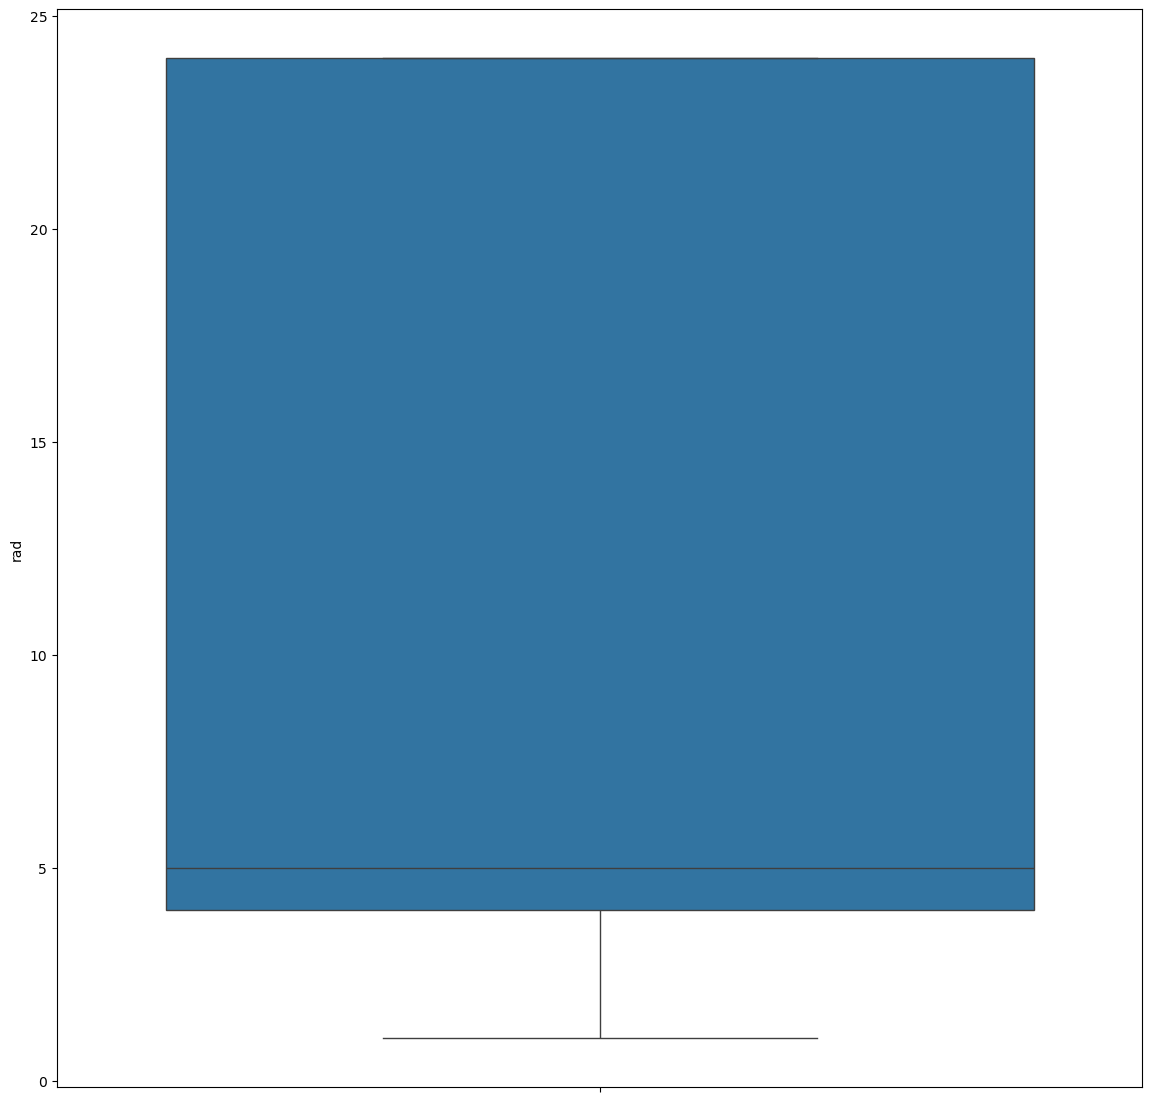

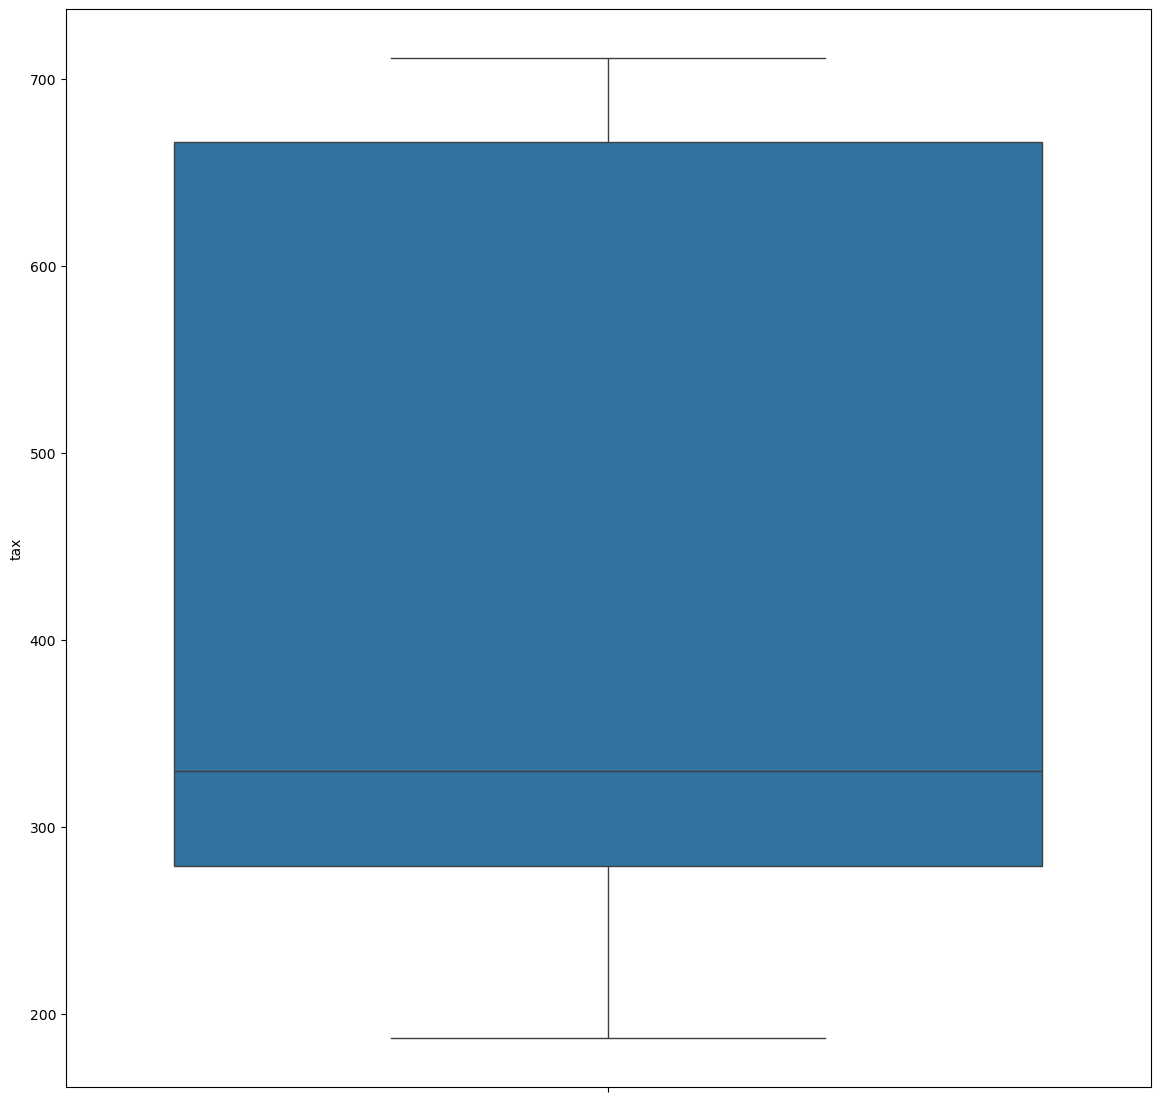

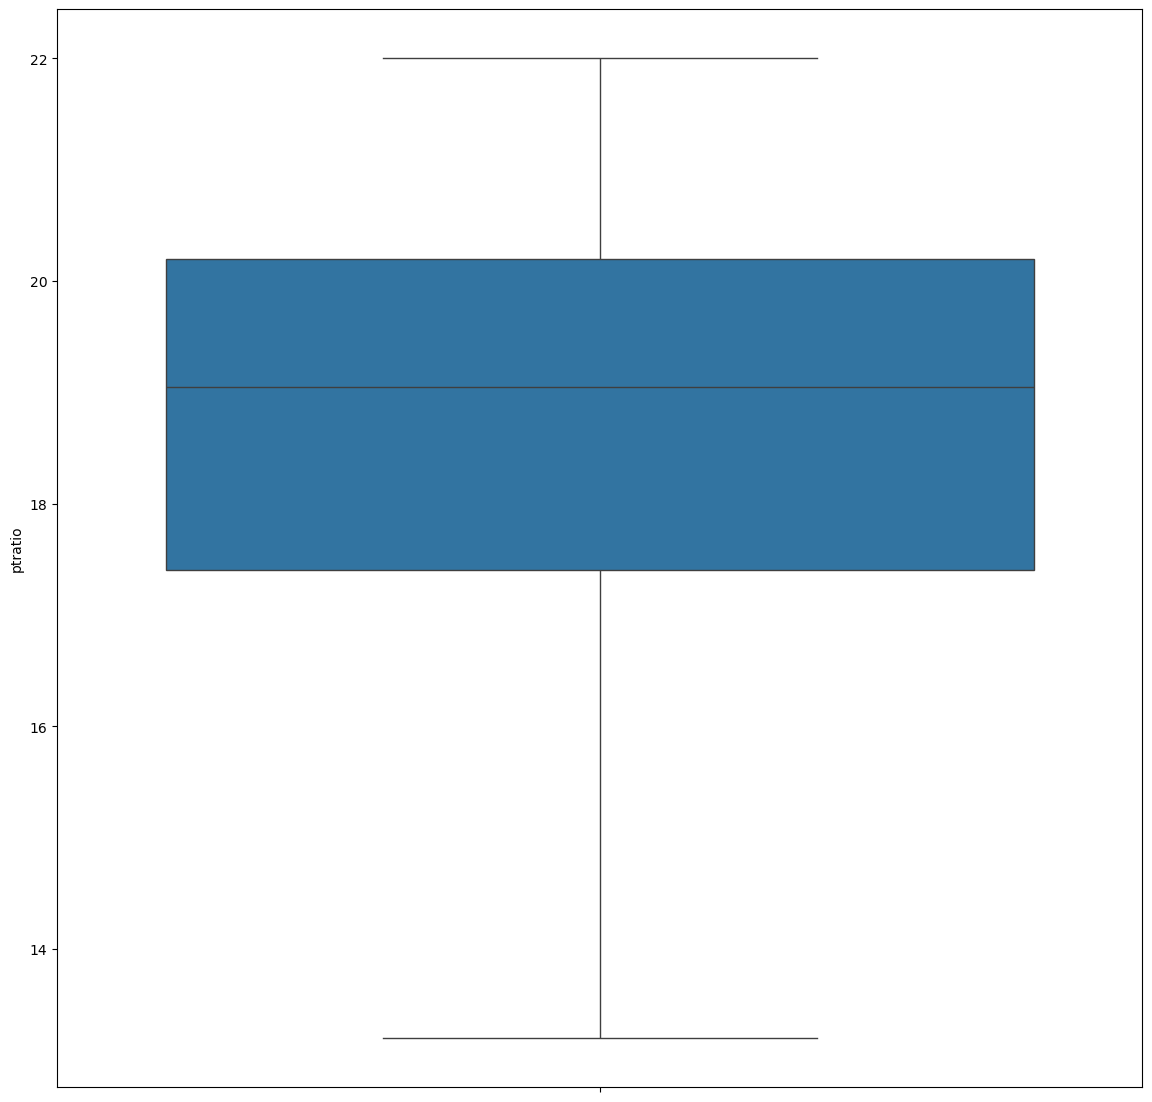

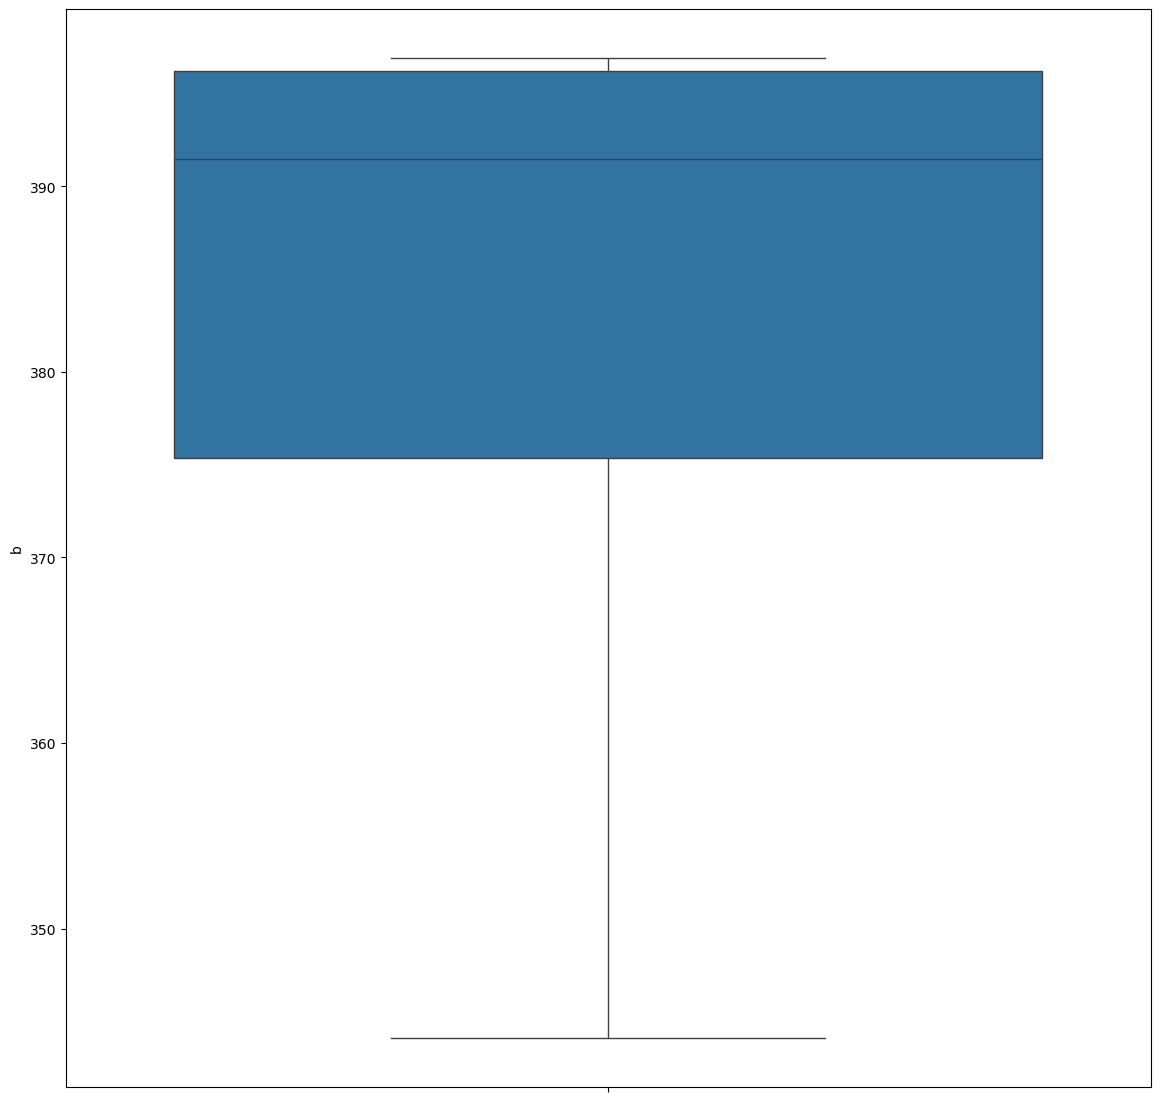

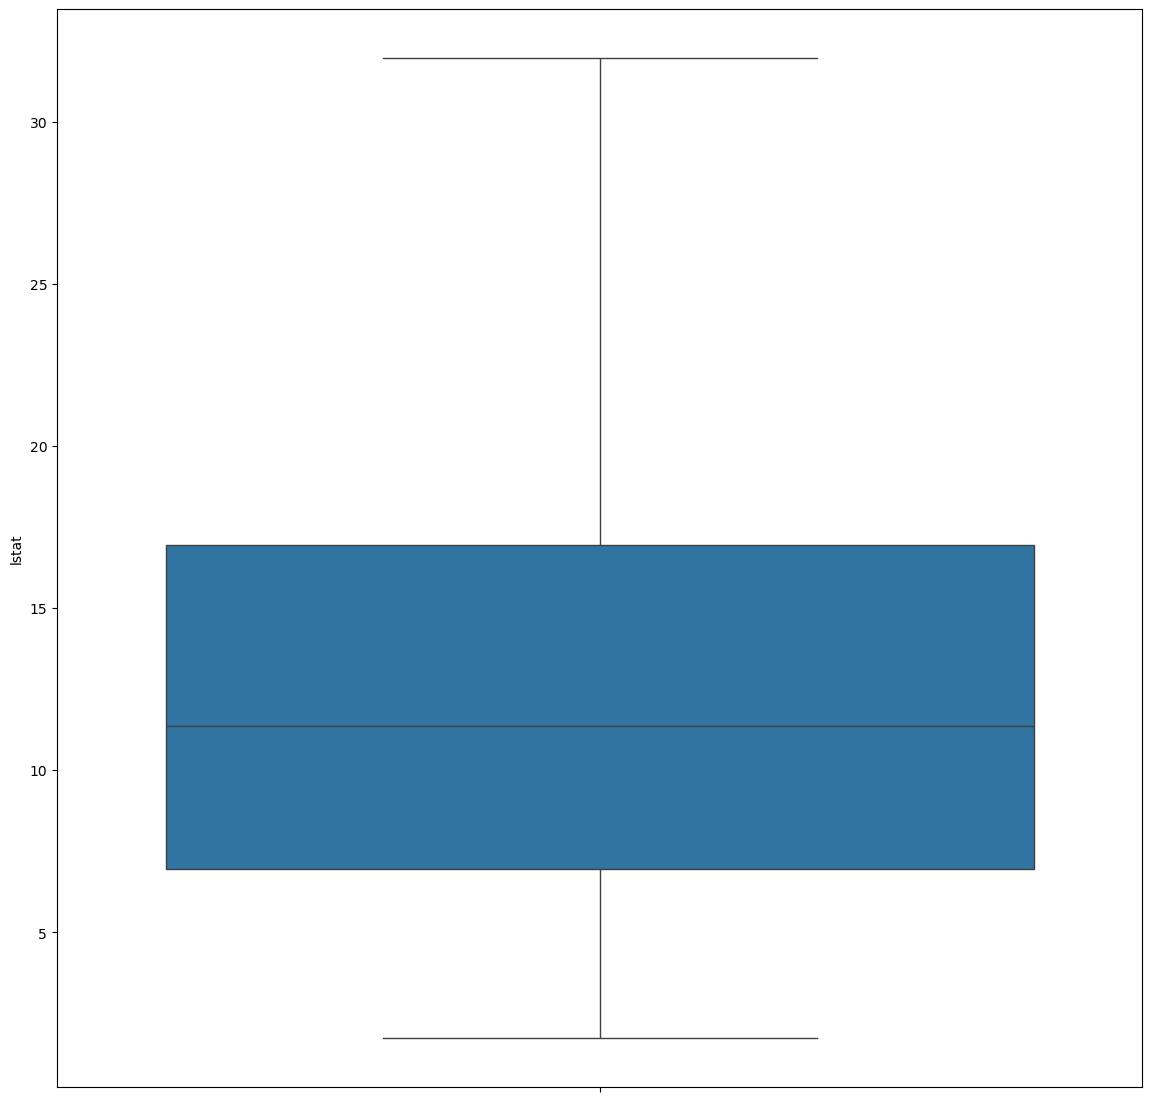

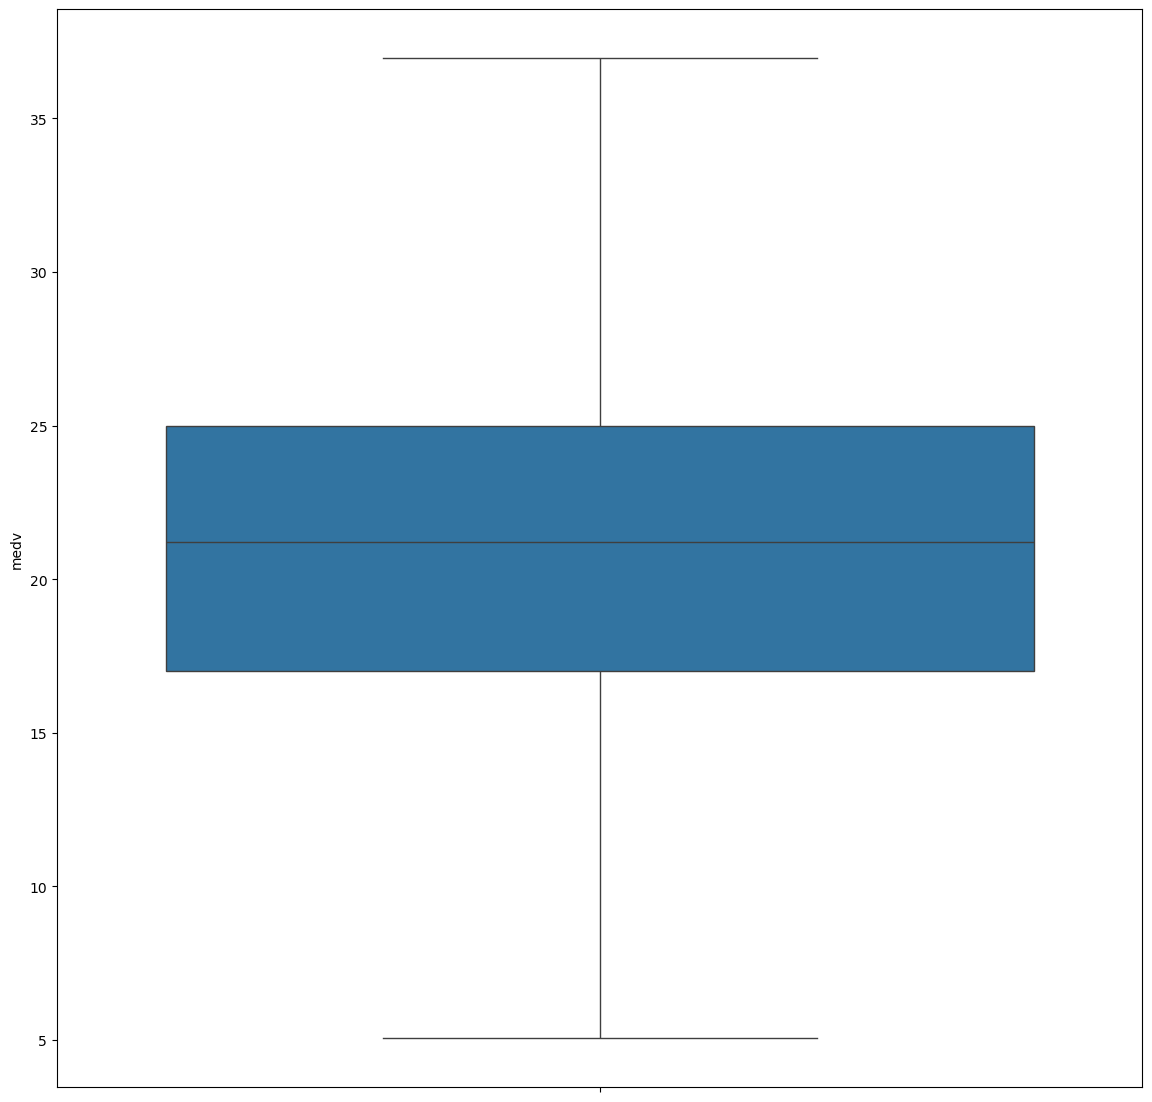

In [136]:
for i in columns:
    plt.figure(figsize=(14,14))
    sns.boxplot(df[i])
    plt.show()

In [137]:
from scipy.stats import skew

In [138]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [139]:
df[["nox","rad","tax","dis","crim","indus","rm"]]=np.log(df[["nox","rad","tax","dis","crim","indus","rm"]]) 
'''
crim :0.25022964990997226
indus :0.29414627684418543
nox :0.3567181222445858
rm :0.29575980420727294
age :-0.5971855948016143
dis :0.13237753841421973
rad :0.28576674040121175
tax :0.3295759344940256
ptratio :-0.7602329696386183
b :-1.160753513452725
lstat :-0.33954452371791966
medv :-0.7093763538519535
'''
# Negitevely Skewed :lstat,b,medv,ptratio,age

'\ncrim :0.25022964990997226\nindus :0.29414627684418543\nnox :0.3567181222445858\nrm :0.29575980420727294\nage :-0.5971855948016143\ndis :0.13237753841421973\nrad :0.28576674040121175\ntax :0.3295759344940256\nptratio :-0.7602329696386183\nb :-1.160753513452725\nlstat :-0.33954452371791966\nmedv :-0.7093763538519535\n'

In [140]:
#The best way to deal with negative skewness is  Reflection and Log Transformation
a = df[['b','age']].max() + 1 
df[['b','age']] = np.log(a - df[['b','age']]) 

In [141]:
b = df['medv'].max() + 1 
df['medv'] = np.log(b - df['medv']) 

In [142]:
d = df['lstat'].max() + 1 
df['lstat'] = np.log(d - df['lstat']) 

In [143]:
c = df['ptratio'].max() + 1 
df['ptratio'] = np.log(c - df['ptratio']) 

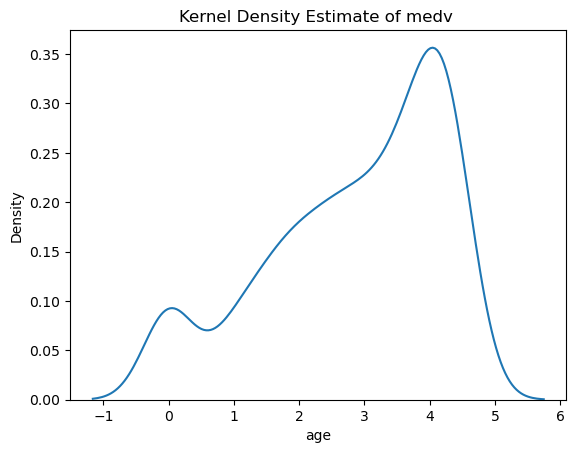

In [144]:
sns.kdeplot(data=df, x='age') 
plt.title("Kernel Density Estimate of medv ")
plt.show()

In [145]:
df["indus"].mean()>df["indus"].median()

False

In [146]:
df.drop(['chas','zn'],axis=1,inplace=True)

In [147]:
numerical_col=df.select_dtypes(['int','float']).columns
numerical_col

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'b', 'lstat', 'medv'],
      dtype='object')

In [148]:
for i in numerical_col:
    print(f"{i} :{skew(df[i])}")

crim :0.25022964990997226
indus :-0.6412176342769845
nox :0.3567181222445858
rm :-0.038188533684848903
age :-0.7043026846842587
dis :0.13237753841421973
rad :0.28576674040121175
tax :0.3295759344940256
ptratio :0.05641894370583971
b :0.06357179681261822
lstat :-2.7422261082165758
medv :-1.9146060114202081


<Axes: >

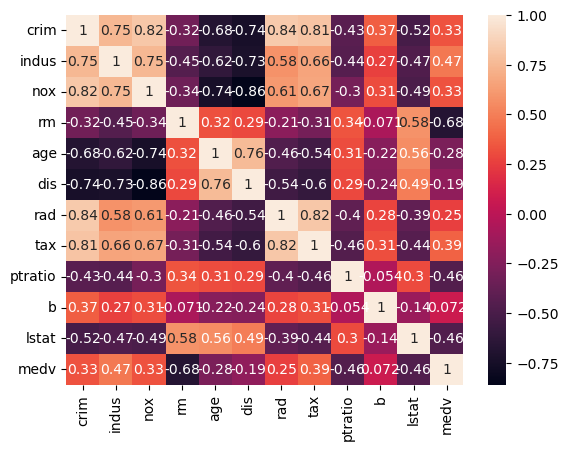

In [149]:
sns.heatmap(df[numerical_col].corr(),annot=True)

In [150]:
'''

highly co-related featues:
rm :0.29575980420727294- slightly positive skewed
indus :0.29414627684418543- slightly positive skewed

crim :1.2785084594635476- highly positive skewed


Negtively Skewed:
ptratio :-0.7602329696386183
b :-1.160753513452725
age :-0.5971855948016143

nox :0.7271441597740319
dis :0.9057712057246071
rad :1.0018334924536951
tax :0.6679682687237768
lstat :0.8062719847536663
medv :0.35256457780103845
'''

'\n\nhighly co-related featues:\nrm :0.29575980420727294- slightly positive skewed\nindus :0.29414627684418543- slightly positive skewed\n\ncrim :1.2785084594635476- highly positive skewed\n\n\nNegtively Skewed:\nptratio :-0.7602329696386183\nb :-1.160753513452725\nage :-0.5971855948016143\n\nnox :0.7271441597740319\ndis :0.9057712057246071\nrad :1.0018334924536951\ntax :0.6679682687237768\nlstat :0.8062719847536663\nmedv :0.35256457780103845\n'

In [151]:
features=df
target=df['medv']
features.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio',
       'b', 'lstat', 'medv'],
      dtype='object')

In [152]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
features.iloc[:]=scaler.fit_transform(features.iloc[:]) # This selects all rows and all columns of the features DataFrame.
#Using .iloc[:] here is a technique to ensure the entire 
#block of data is replaced, often used to prevent SettingWithCopyWarning in pandas.
features.head()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-2.074400,-1.704344,-0.049040,0.515644,0.539359,0.412812,-2.136989,-0.608739,1.361707,-1.320551,0.740049,0.108075
1,-1.352545,-0.263239,-0.730942,0.279102,0.180377,0.774803,-1.343886,-1.117412,0.524022,-1.320551,0.461580,0.287840
2,-1.352907,-0.263239,-0.730942,1.401111,0.620052,0.774803,-1.343886,-1.117412,0.524022,-0.187944,0.797812,-1.539651
3,-1.268707,-1.778965,-0.848853,1.137917,0.861611,1.146008,-0.879950,-1.335255,0.118489,-0.493922,0.861797,-1.159558
4,-0.895039,-1.778965,-0.848853,1.348187,0.738758,1.146008,-0.879950,-1.335255,0.118489,-1.320551,0.718271,-2.237510


In [153]:
df.isnull().sum()/len(df)*100

crim       0.0
indus      0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

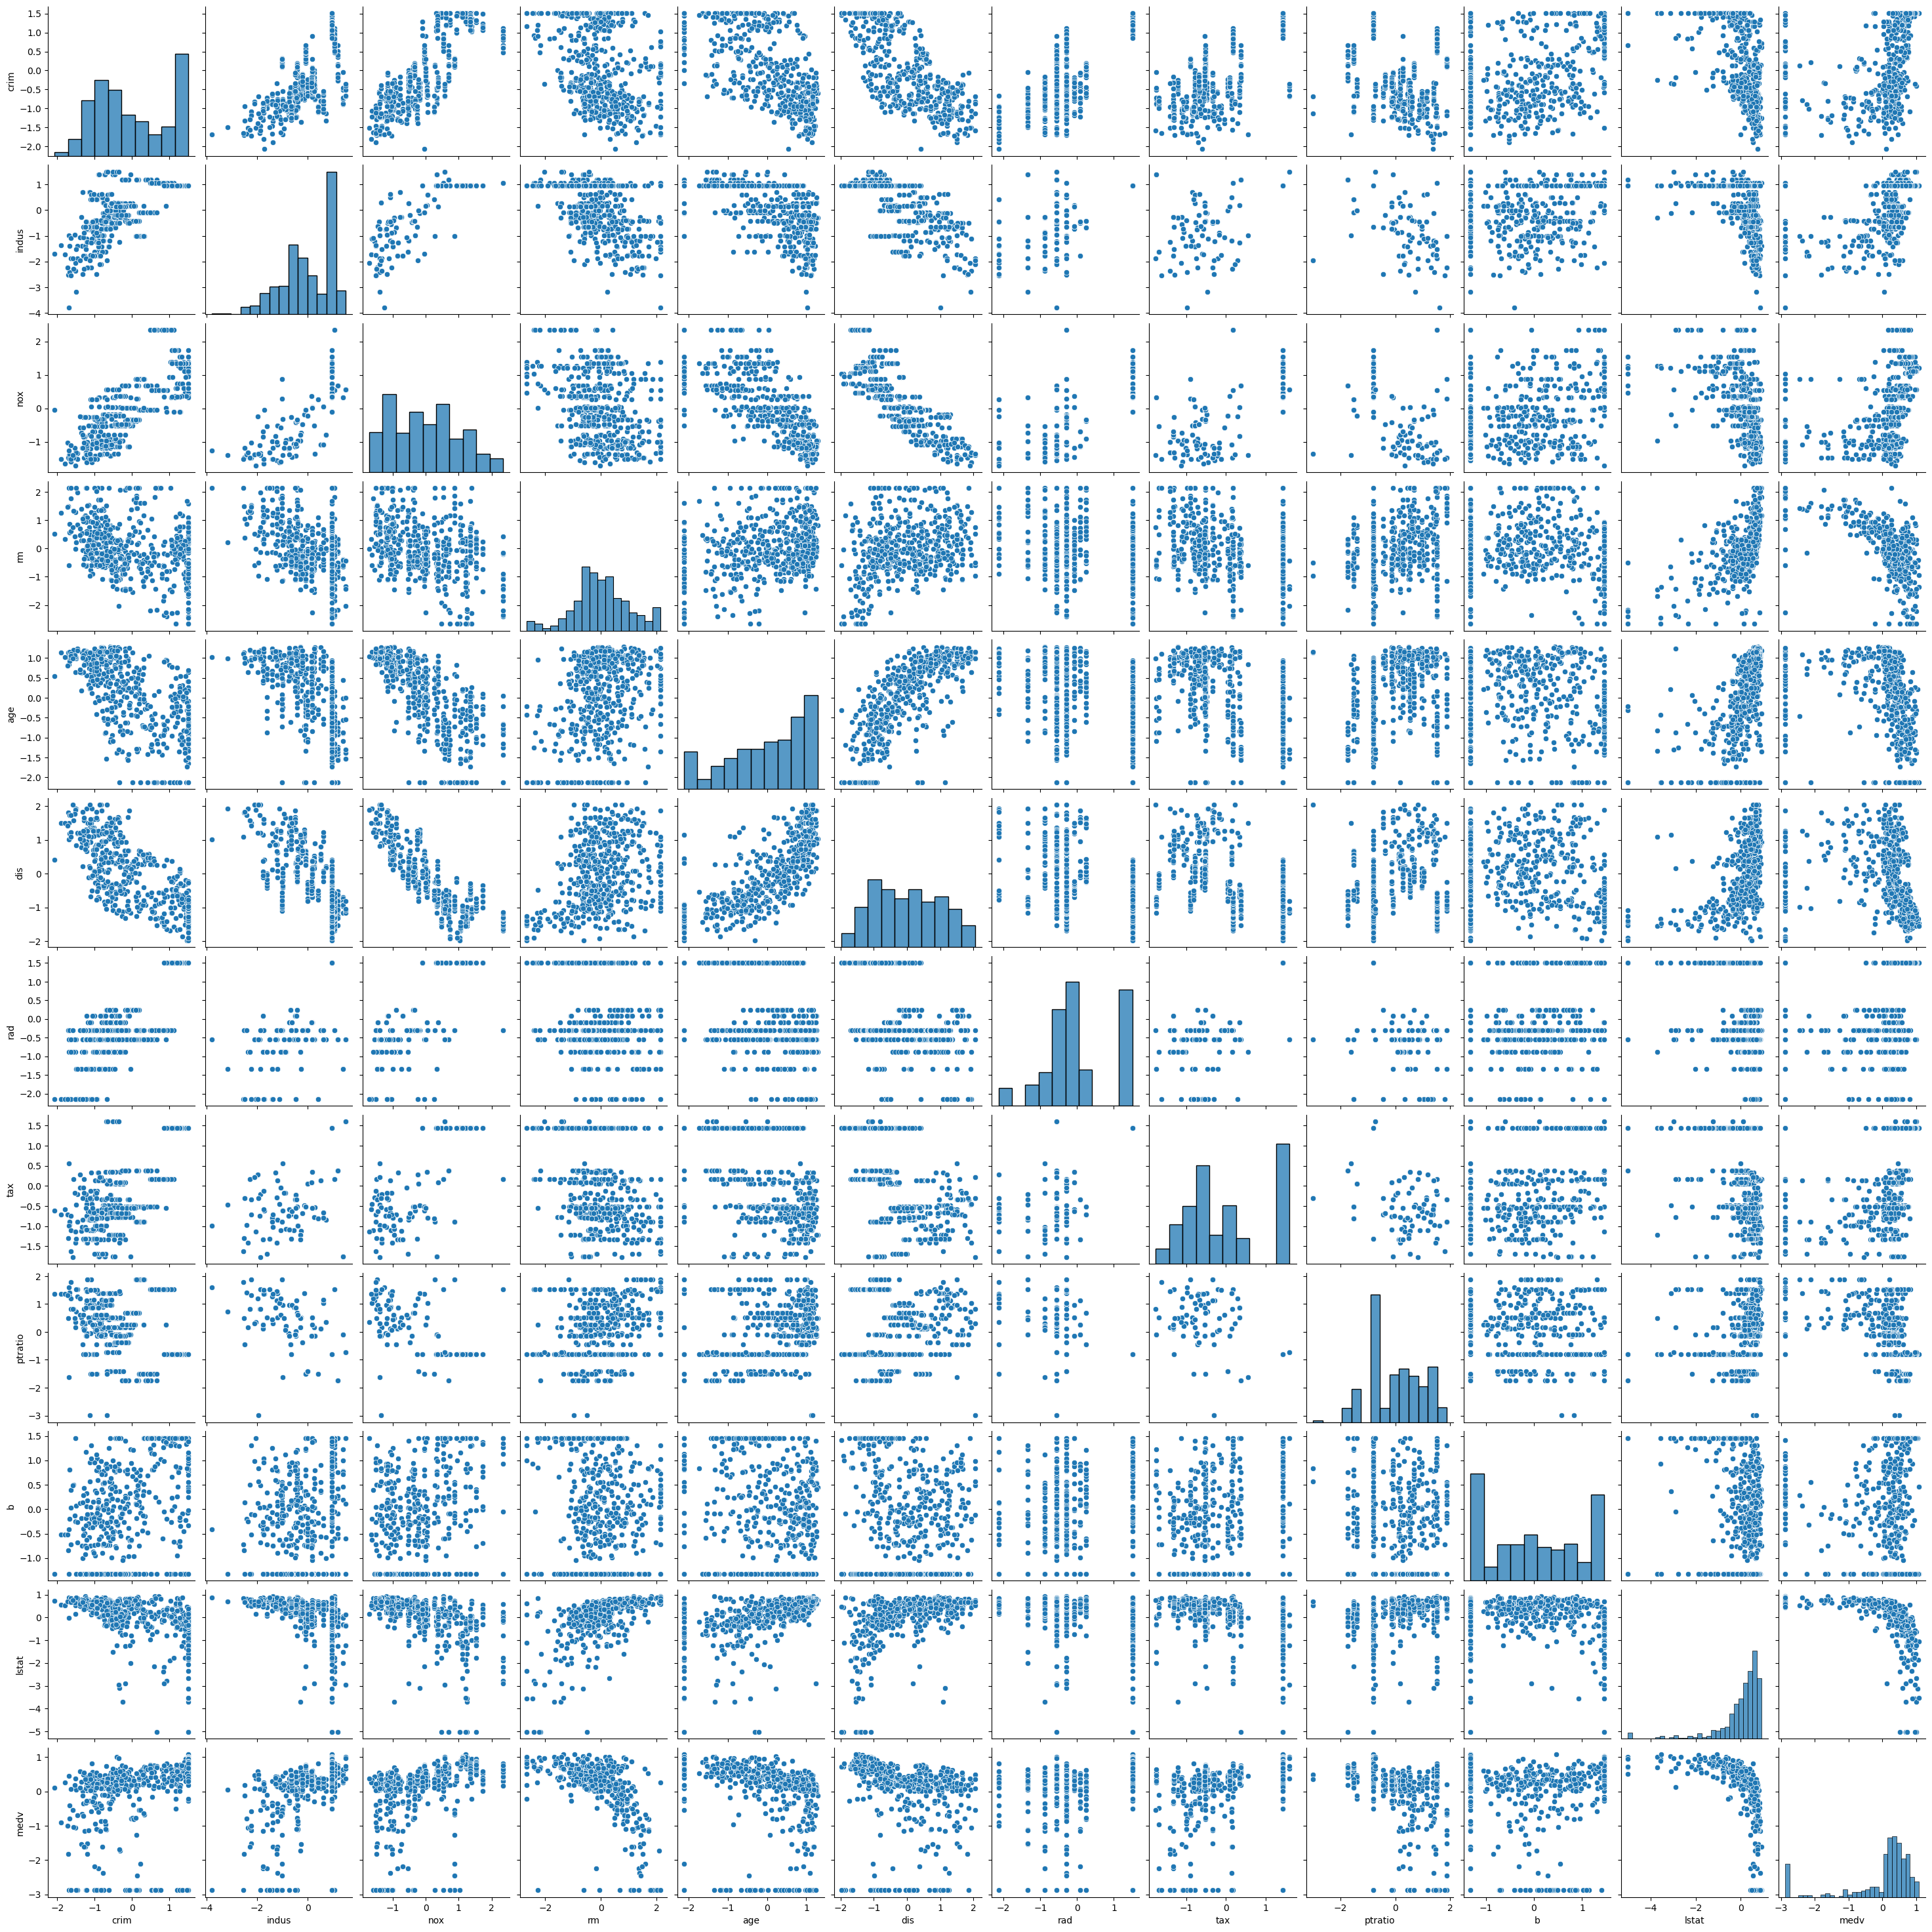

In [154]:
sns.pairplot(df)

In [155]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=1) 

In [156]:
print(xtrain.shape,ytrain.shape)

(404, 12) (404,)


In [157]:
print(xtest.shape,ytest.shape)

(102, 12) (102,)


In [158]:
df[numerical_col].corr()['medv'].sort_values()

rm        -0.678515
lstat     -0.464336
ptratio   -0.460102
age       -0.275781
dis       -0.185552
b          0.071658
rad        0.254683
crim       0.326656
nox        0.330655
tax        0.387285
indus      0.471116
medv       1.000000
Name: medv, dtype: float64

In [159]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [160]:
f=pd.DataFrame(
    {
        "columns":features.columns,
        "coef":lr.coef_
    }
)
f

,columns,coef
0,crim,-5.744065e-16
1,indus,8.881784e-16
2,nox,6.175616e-16
3,rm,2.775558e-17
4,age,9.714451e-17
5,dis,2.081668e-17
6,rad,1.040834e-16
7,tax,-4.857226e-17
8,ptratio,2.428613e-17
9,b,-4.163336e-17


In [161]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
r2=r2_score(ytest,ypred)

In [162]:
print(f"MSE {mse}\nR2-Score :{r2}")

MSE 1.633341298315133e-30
R2-Score :1.0


In [163]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,8):
    poly = PolynomialFeatures(degree=i) 
    xtrainp=poly.fit_transform(xtrain) 
    xtestp=poly.transform(xtest) 
    print(xtrainp.shape) 
    l=LinearRegression()
    l.fit(xtrainp,ytrain)
    ypred=l.predict(xtestp)
    mse=mean_squared_error(ytest,ypred)
    r2-r2_score(ytest,ypred) 
    print(f"MSE : {mse}") 
    print(f"R2: {r2}")
    print(f"""{i}: trainig_score {l.score(xtrainp,ytrain)}
    test_score {l.score(xtestp,ytest)}""")

(404, 91)
MSE : 2.3419233305146782e-29
R2: 1.0
2: trainig_score 1.0
    test_score 1.0
(404, 455)
MSE : 0.0007619203026380464
R2: 1.0
3: trainig_score 1.0
    test_score 0.9993669539315976
(404, 1820)
MSE : 0.02931655033388595
R2: 1.0
4: trainig_score 1.0
    test_score 0.9756421677388937
(404, 6188)
MSE : 0.12539771623399137
R2: 1.0
5: trainig_score 1.0
    test_score 0.8958125528697393
(404, 18564)
MSE : 0.5051980201159156
R2: 1.0
6: trainig_score 1.0
    test_score 0.5802531848911648
(404, 50388)
MSE : 1.695740883731796
R2: 1.0
7: trainig_score 1.0
    test_score -0.4089165175923444


In [164]:
print('Accurate Training Score :', lr.score(xtrain, ytrain))
print('Accurate Test Score     :', lr.score(xtest, ytest))

Accurate Training Score : 1.0
Accurate Test Score     : 1.0


In [165]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [166]:
# Create Ridge model with alpha=99
ri = Ridge(alpha=99)
# Fit the model on training data
ri.fit(xtrain, ytrain)
# Predict on test data
ypred = ri.predict(xtest)

In [167]:
# Calculate MSE and R2
mse = mean_squared_error(ytest, ypred)   
r2 = r2_score(ytest, ypred)
# Print results
print(f"MSE: {mse}")
print(f"R2: {r2}")
# Training and test scores (R^2 by default)
print(f"Training score: {ri.score(xtrain, ytrain)}")
print(f"Test score: {ri.score(xtest, ytest)}")


MSE: 0.06101536026017097
R2: 0.9493050207598822
Training score: 0.9500817896767236
Test score: 0.9493050207598822
